In [192]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [193]:
%autoreload all

In [194]:
import os

import numpy as np
import duckdb
import polars as pl

import matplotlib.pyplot as plt
import seaborn as sns
from duckdb import DuckDBPyRelation

from utils.model_evaluation.overall_performance import *
from utils.model_evaluation.client_benefit import *
from utils.model_evaluation.client_contribution import *

sns.set(font_scale=1.25)
sns.set_style('whitegrid')
sns.set_palette('colorblind')

%matplotlib inline

In [195]:
BASE_DIR = "/home/lukas/Work/Masterthesis/masterthesis-data/"
OUTPUT_DIR = "/home/lukas/Work/Masterthesis/masterthesis-clustered-fl/output/plots/"
OUTPUT_TABLES = "/home/lukas/Work/Masterthesis/masterthesis-clustered-fl/output/tables.tex"

In [196]:
WEIGHTED_AVERAGE = False

In [197]:
if os.path.exists(OUTPUT_TABLES) and os.path.isfile(OUTPUT_TABLES):
    os.remove(OUTPUT_TABLES)

In [198]:
os.makedirs(OUTPUT_DIR, exist_ok=True)

In [199]:
def connect_to_run(run_id: str) -> duckdb.DuckDBPyConnection:
    full_path = os.path.join(BASE_DIR, run_id + ".db")
    if not os.path.exists(full_path):
        raise Exception(f"No database found for run {run_id} at path {full_path}")
    return duckdb.connect(str(full_path))

In [200]:
SQL_FULL = """
SELECT *
FROM configurations
NATURAL JOIN metrics
NATURAL JOIN data_distributions
NATURAL JOIN infos
"""

def get_run_relation(conn: duckdb.DuckDBPyConnection) -> duckdb.DuckDBPyRelation:
    return conn.sql(SQL_FULL)

In [201]:
def log_table(df: pd.DataFrame, name: str) -> pd.DataFrame:
    with open(OUTPUT_TABLES, "a") as f:
        f.write(f"======= {name} =======\n")
        f.write(df.to_latex(float_format="%.3f", index=False))
        f.write("\n\n")
    return df

# Runs

Each run/imbalance combination is in a different db file:

In [202]:
BENEFIT_QUANTITY_CIFAR = "20240523_095552"
BENEFIT_LABEL_DISTRIBUTION_CIFAR = "20240508_164642"
# BENEFIT_FEATURE_DISTRIBUTION_CIFAR = "20240521_112838" # diff. feature imbalance
BENEFIT_FEATURE_DISTRIBUTION_CIFAR = "20240615_132639"
BENEFIT_QUANTITY_MNIST = "20240525_142650"
BENEFIT_LABEL_DISTRIBUTION_MNIST = "20240515_143650"
# BENEFIT_FEATURE_DISTRIBUTION_MNIST = "20240522_092910" # diff. feature imbalance
BENEFIT_FEATURE_DISTRIBUTION_MNIST = "20240615_132639"

CONTRIBUTION_FEATURE_DISTRIBUTION_CIFAR = "20240608_201758"
CONTRIBUTION_FEATURE_DISTRIBUTION_MNIST = "20240609_091903"

# Overall Model Training

## Quantity Imbalance

### CIFAR-10

In [307]:
conn = connect_to_run(BENEFIT_QUANTITY_CIFAR)
data = get_run_relation(conn)

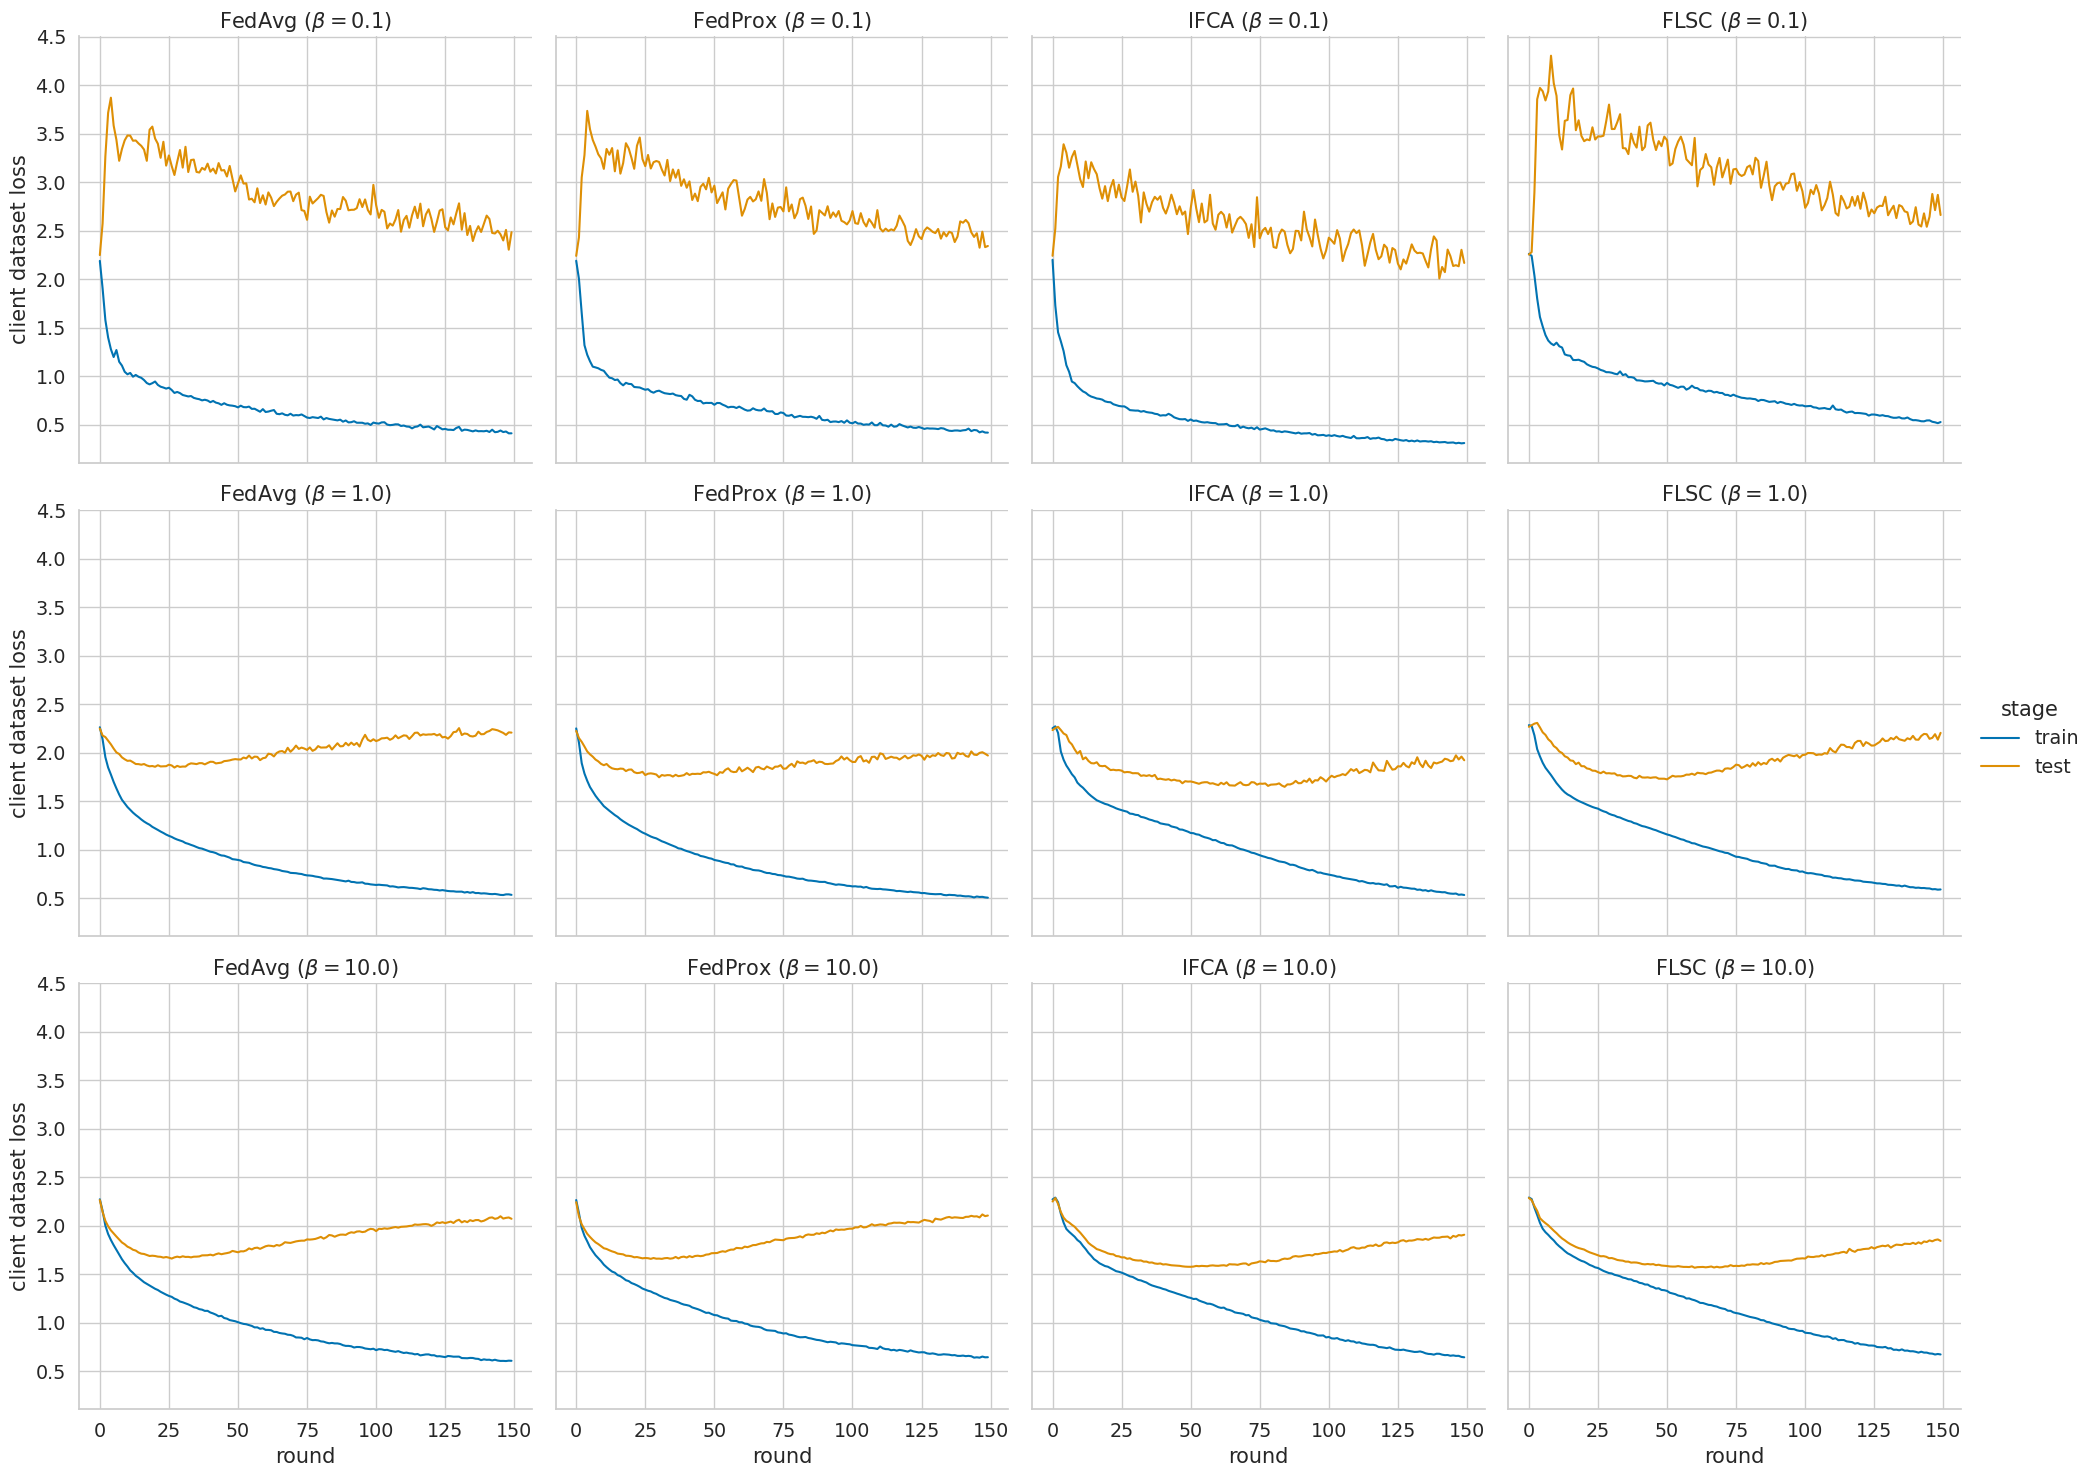

In [308]:
loss_plots(conn, data, weighted=WEIGHTED_AVERAGE).savefig(os.path.join(OUTPUT_DIR, "losses_cifar10_quantity_imbalance.png"))

/home/lukas/Work/Masterthesis/masterthesis-clustered-fl/utils/model_evaluation/overall_performance.py:52: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  return sns.relplot(average_f1_data, x="round", y=y, col="algorithm", hue="beta", kind="line",


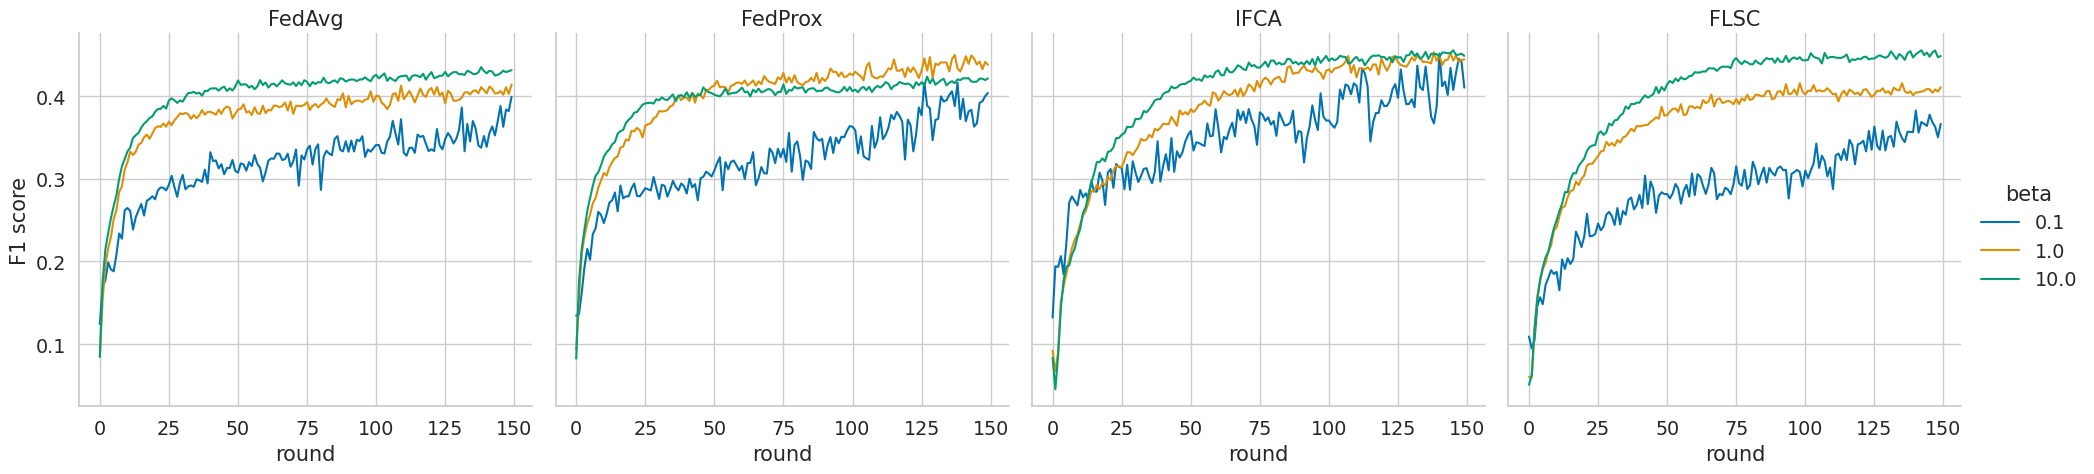

In [309]:
f1_plots(conn, data, weighted=WEIGHTED_AVERAGE).savefig(os.path.join(OUTPUT_DIR, "f1scores_cifar10_quantity_imbalance.png"))

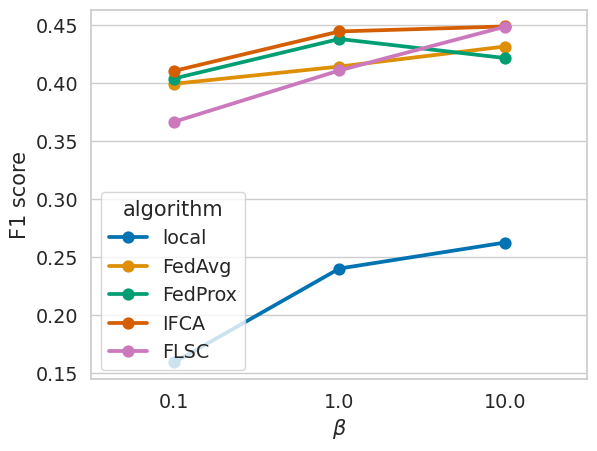

In [310]:
overall_f1_vs_imbalance_plots(conn, data, weighted=WEIGHTED_AVERAGE).savefig(os.path.join(OUTPUT_DIR, "final_f1scores_cifar10_quantity_imbalance.png"))

In [311]:
conn.close()

### MNIST

In [208]:
conn = connect_to_run(BENEFIT_QUANTITY_MNIST)
data = get_run_relation(conn)

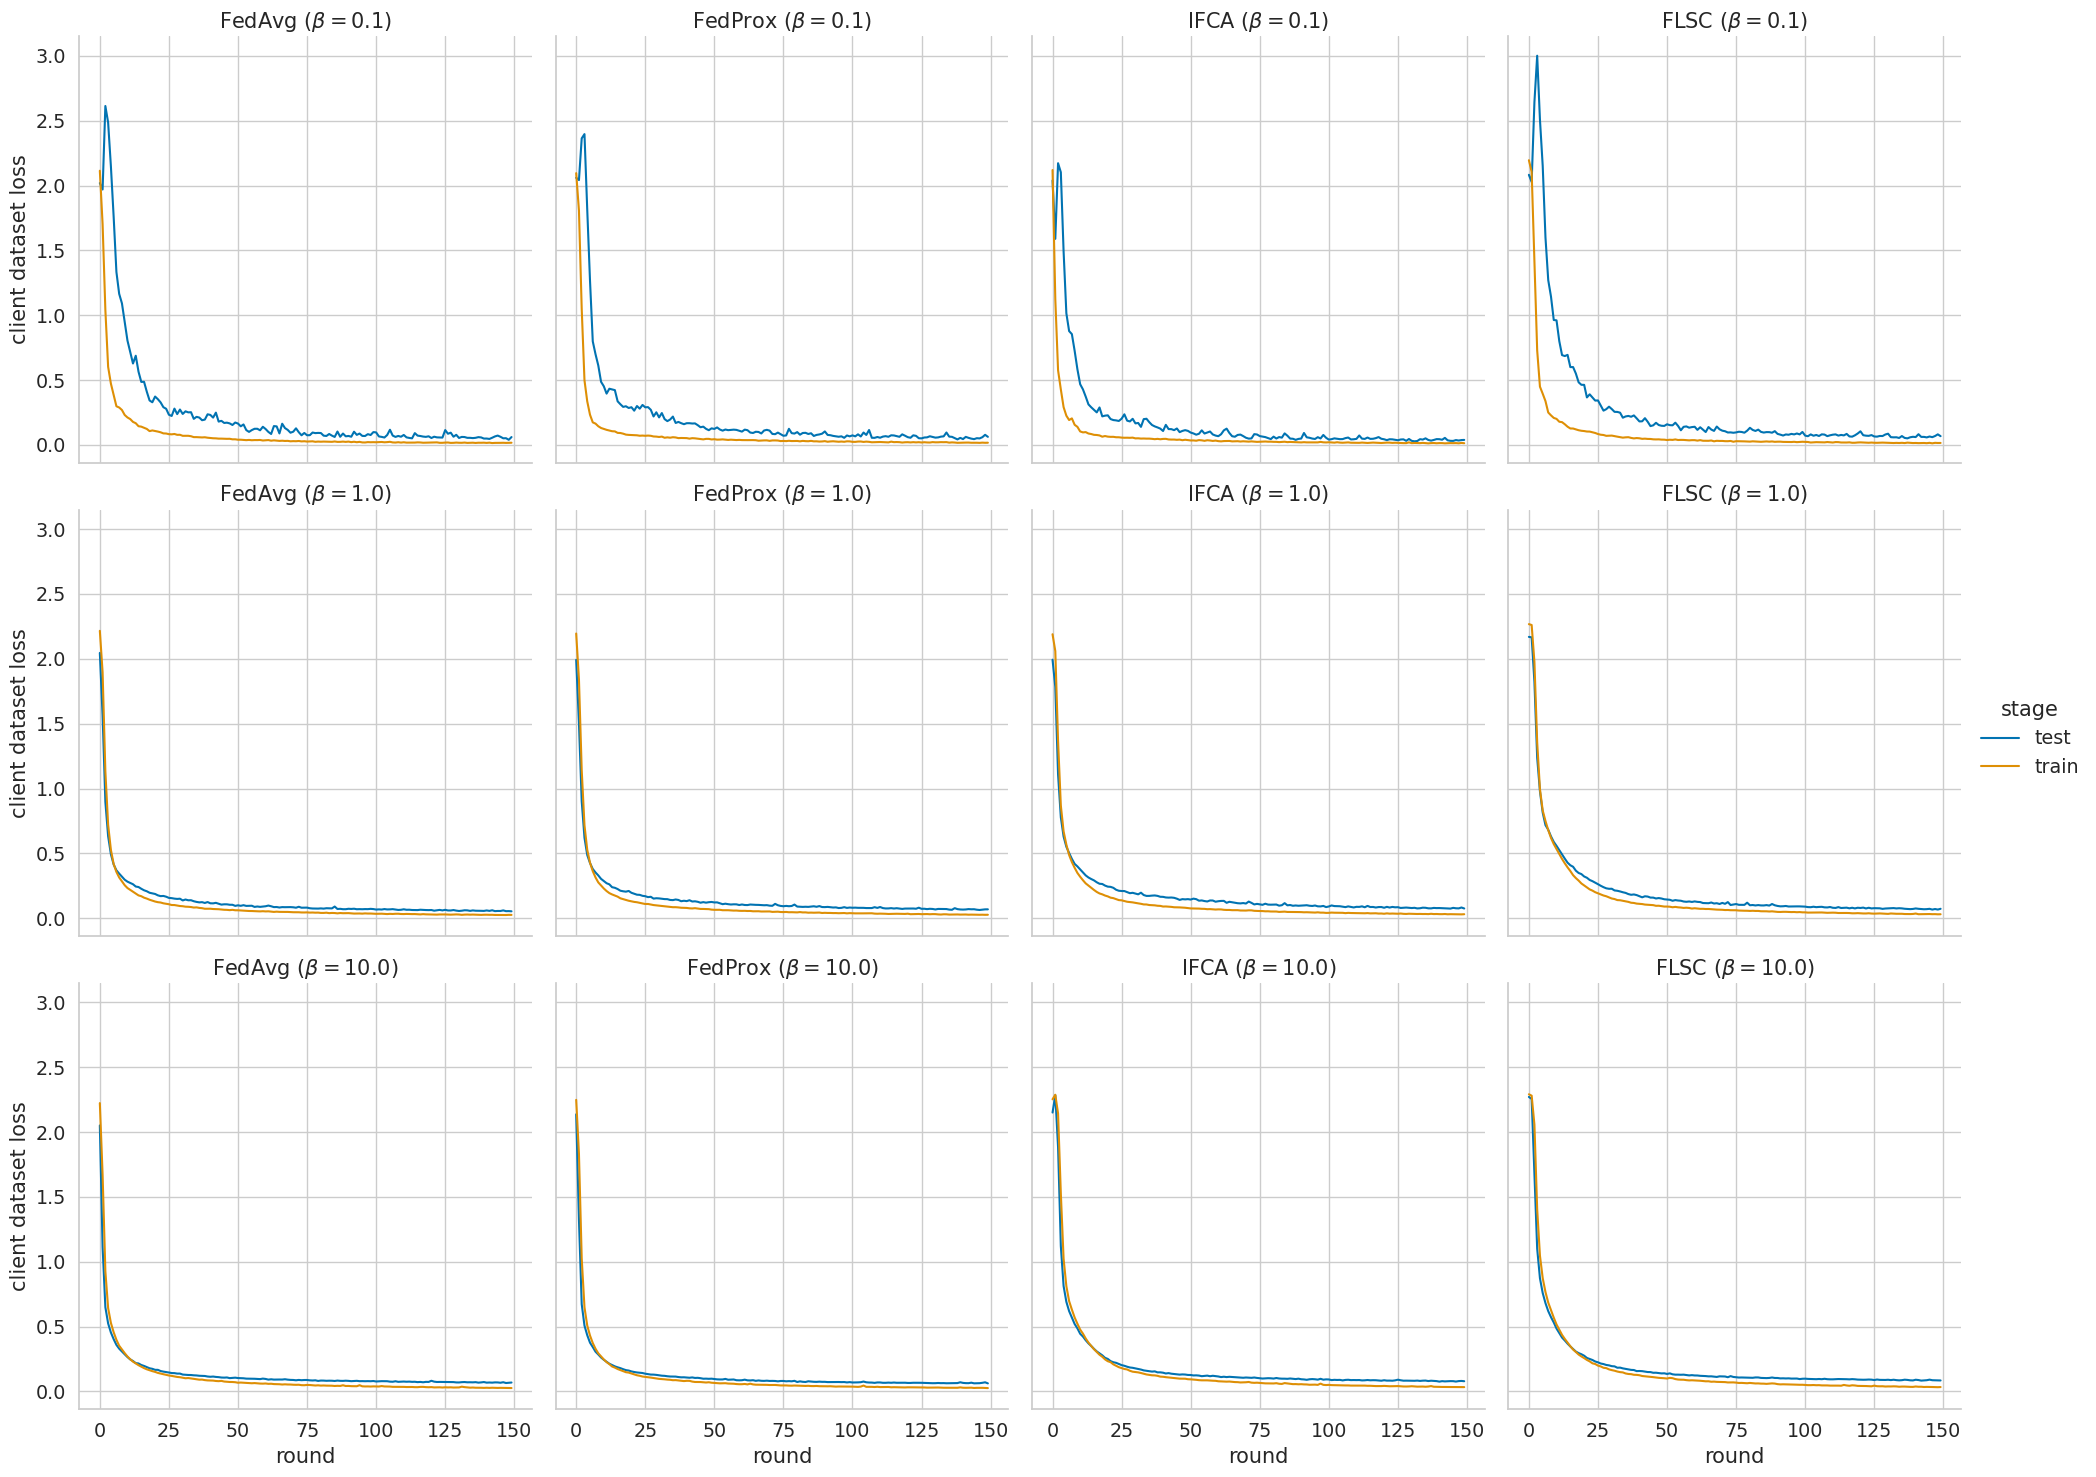

In [209]:
loss_plots(conn, data, weighted=WEIGHTED_AVERAGE).savefig(os.path.join(OUTPUT_DIR, "losses_mnist_quantity_imbalance.png"))

/home/lukas/Work/Masterthesis/masterthesis-clustered-fl/utils/model_evaluation/overall_performance.py:52: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  return sns.relplot(average_f1_data, x="round", y=y, col="algorithm", hue="beta", kind="line",


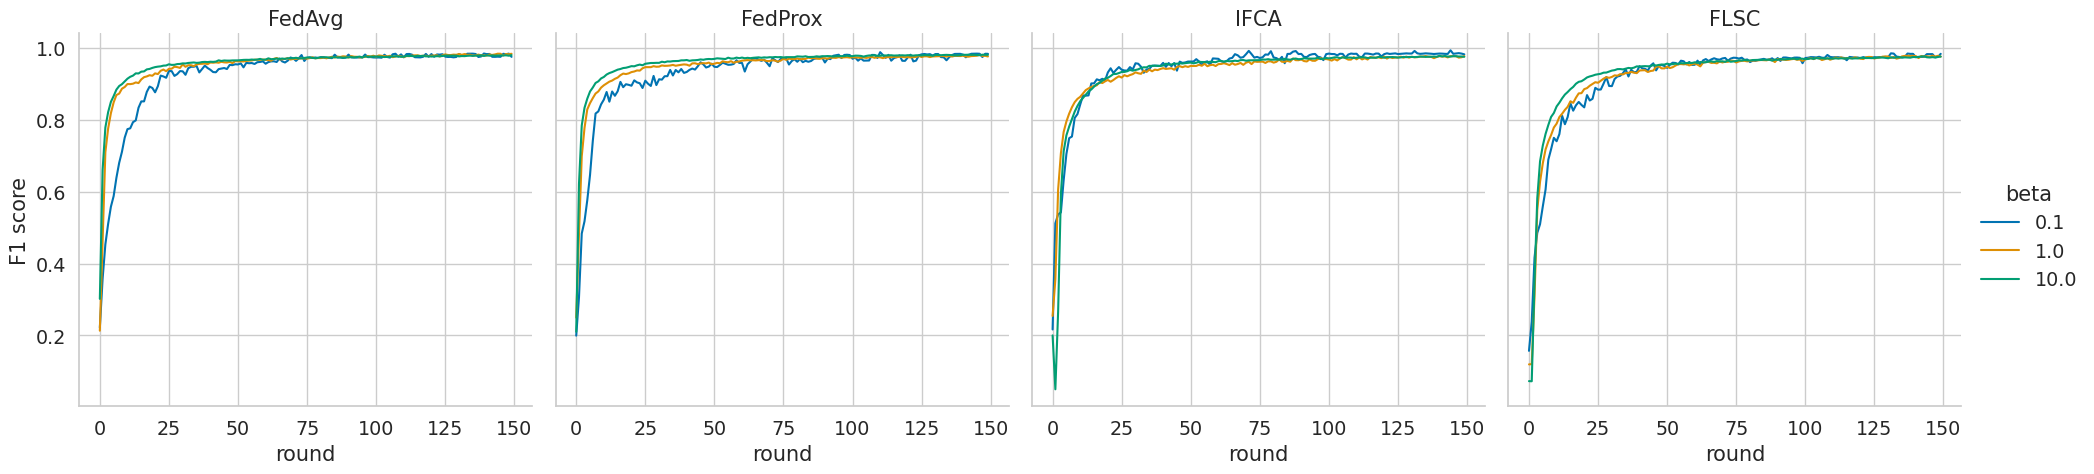

In [210]:
f1_plots(conn, data, weighted=WEIGHTED_AVERAGE).savefig(os.path.join(OUTPUT_DIR, "f1scores_mnist_quantity_imbalance.png"))

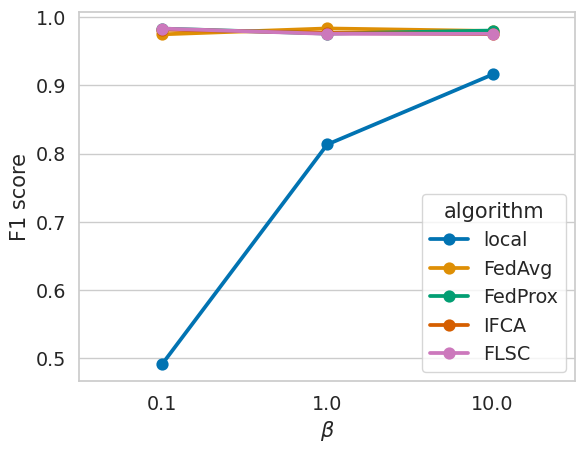

In [211]:
overall_f1_vs_imbalance_plots(conn, data, weighted=WEIGHTED_AVERAGE).savefig(os.path.join(OUTPUT_DIR, "final_f1scores_mnist_quantity_imbalance.png"))

In [212]:
conn.close()

## Label (Distribution) Imbalance

### CIFAR-10

In [213]:
conn = connect_to_run(BENEFIT_LABEL_DISTRIBUTION_CIFAR)
data = get_run_relation(conn)

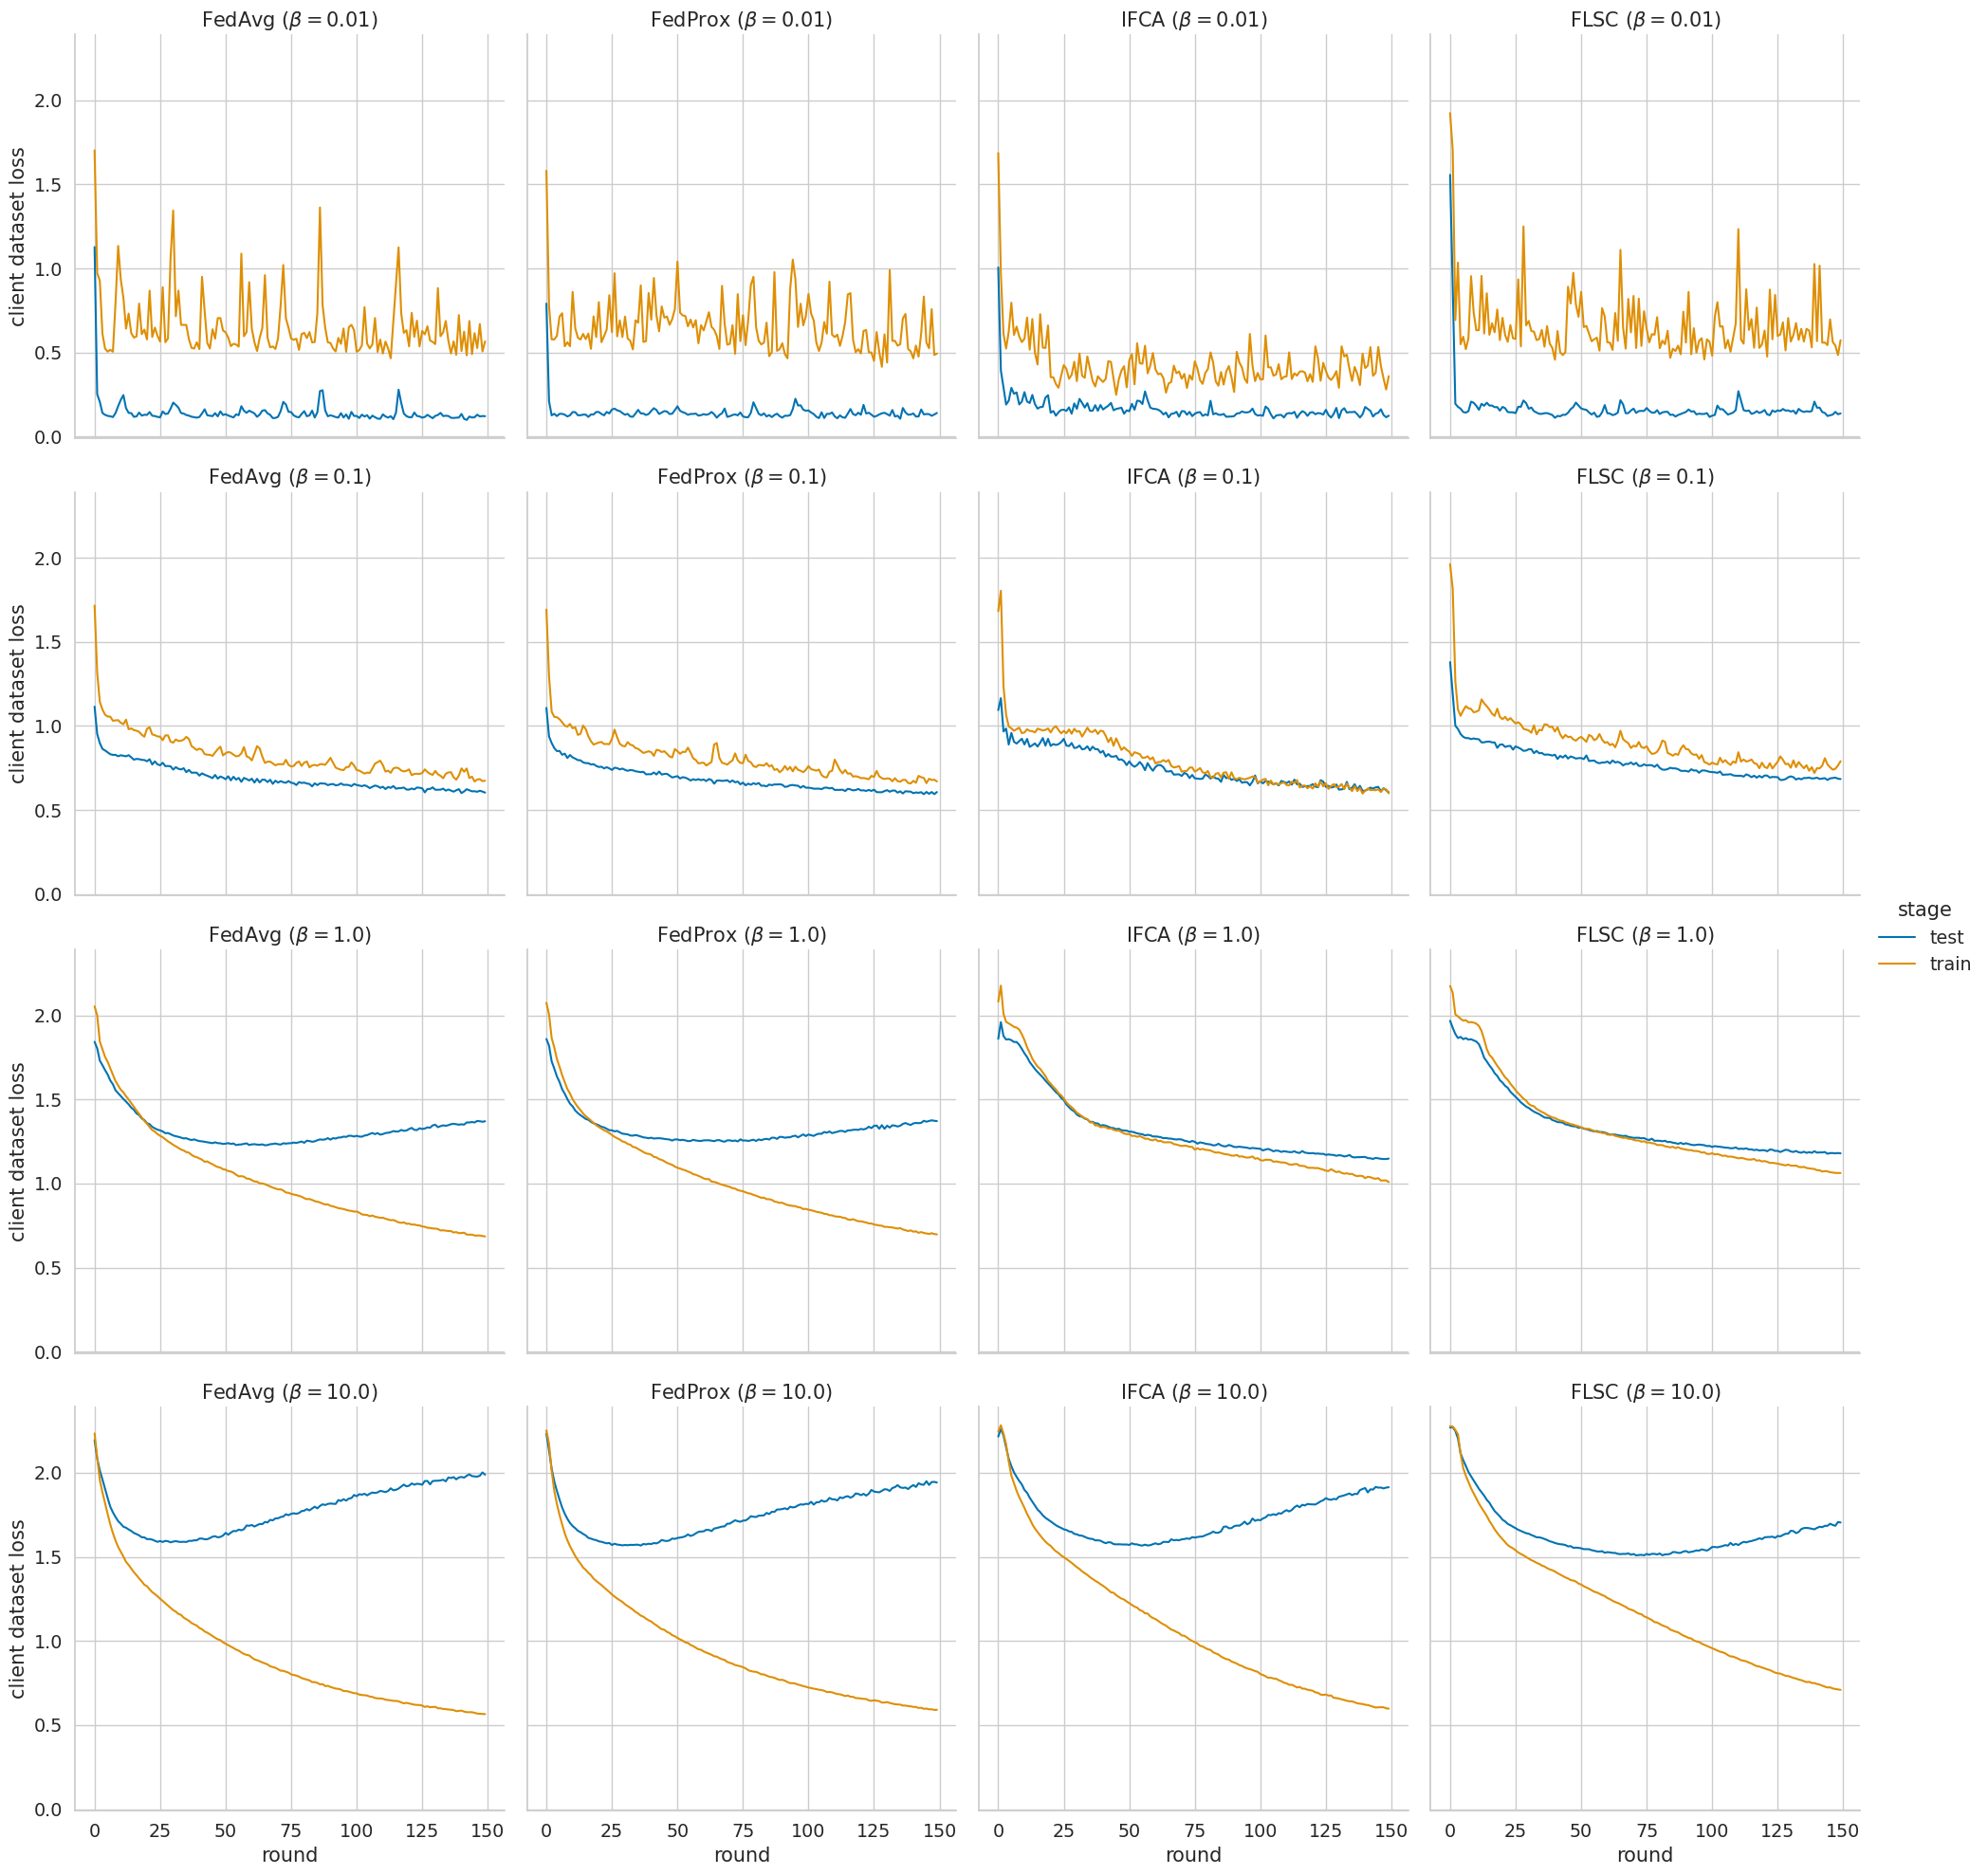

In [214]:
loss_plots(conn, data, weighted=WEIGHTED_AVERAGE).savefig(os.path.join(OUTPUT_DIR, "losses_cifar10_label_distribution_imbalance.png"))

/home/lukas/Work/Masterthesis/masterthesis-clustered-fl/utils/model_evaluation/overall_performance.py:52: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  return sns.relplot(average_f1_data, x="round", y=y, col="algorithm", hue="beta", kind="line",


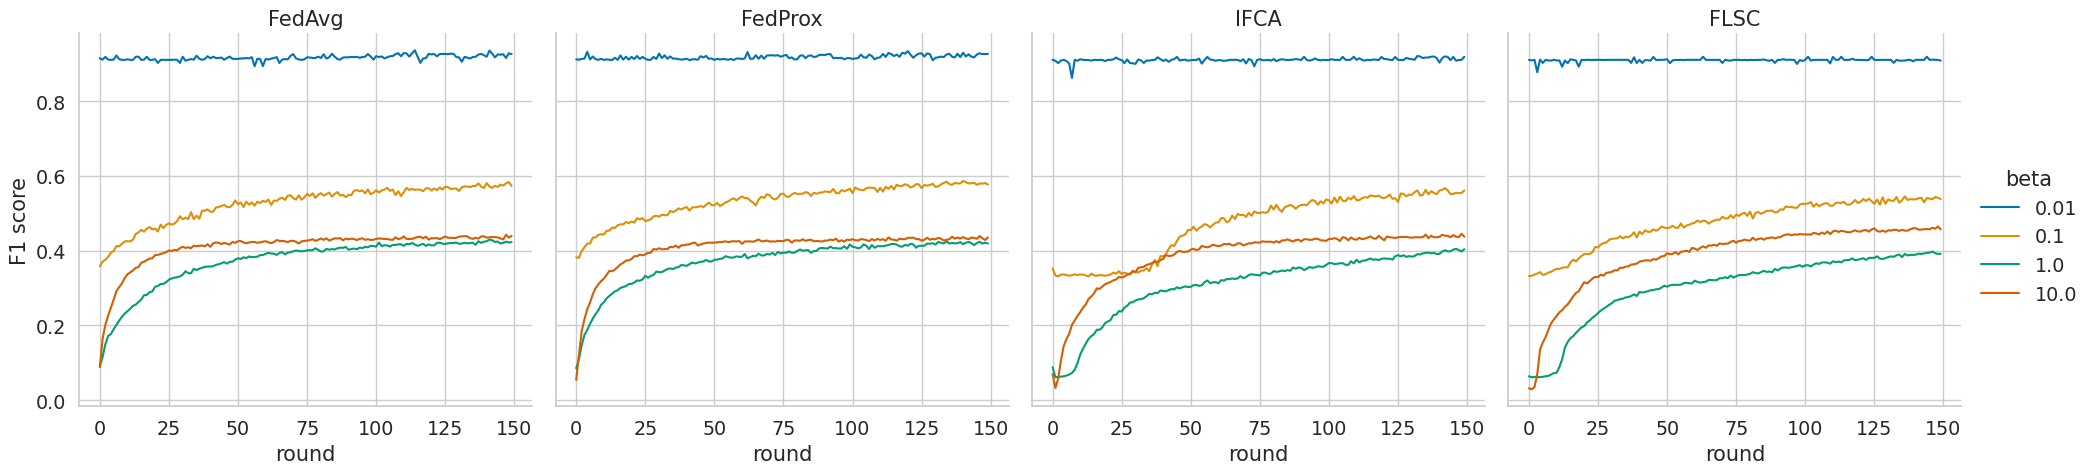

In [215]:
f1_plots(conn, data, weighted=WEIGHTED_AVERAGE).savefig(os.path.join(OUTPUT_DIR, "f1scores_cifar10_label_distribution_imbalance.png"))

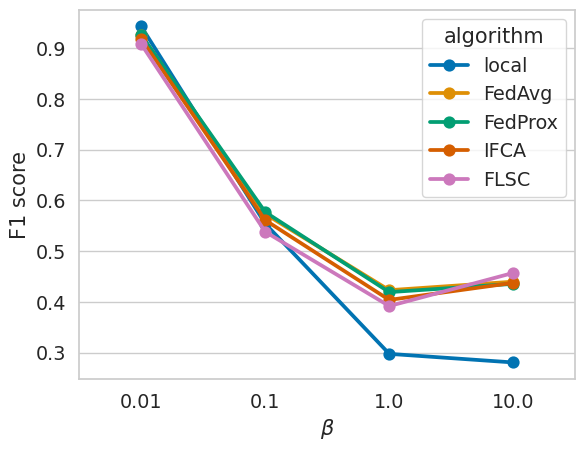

In [216]:
overall_f1_vs_imbalance_plots(conn, data, weighted=WEIGHTED_AVERAGE).savefig(os.path.join(OUTPUT_DIR, "final_f1scores_cifar10_label_distribution_imbalance.png"))

In [217]:
conn.close()

### MNIST

In [218]:
conn = connect_to_run(BENEFIT_LABEL_DISTRIBUTION_MNIST)
data = get_run_relation(conn)

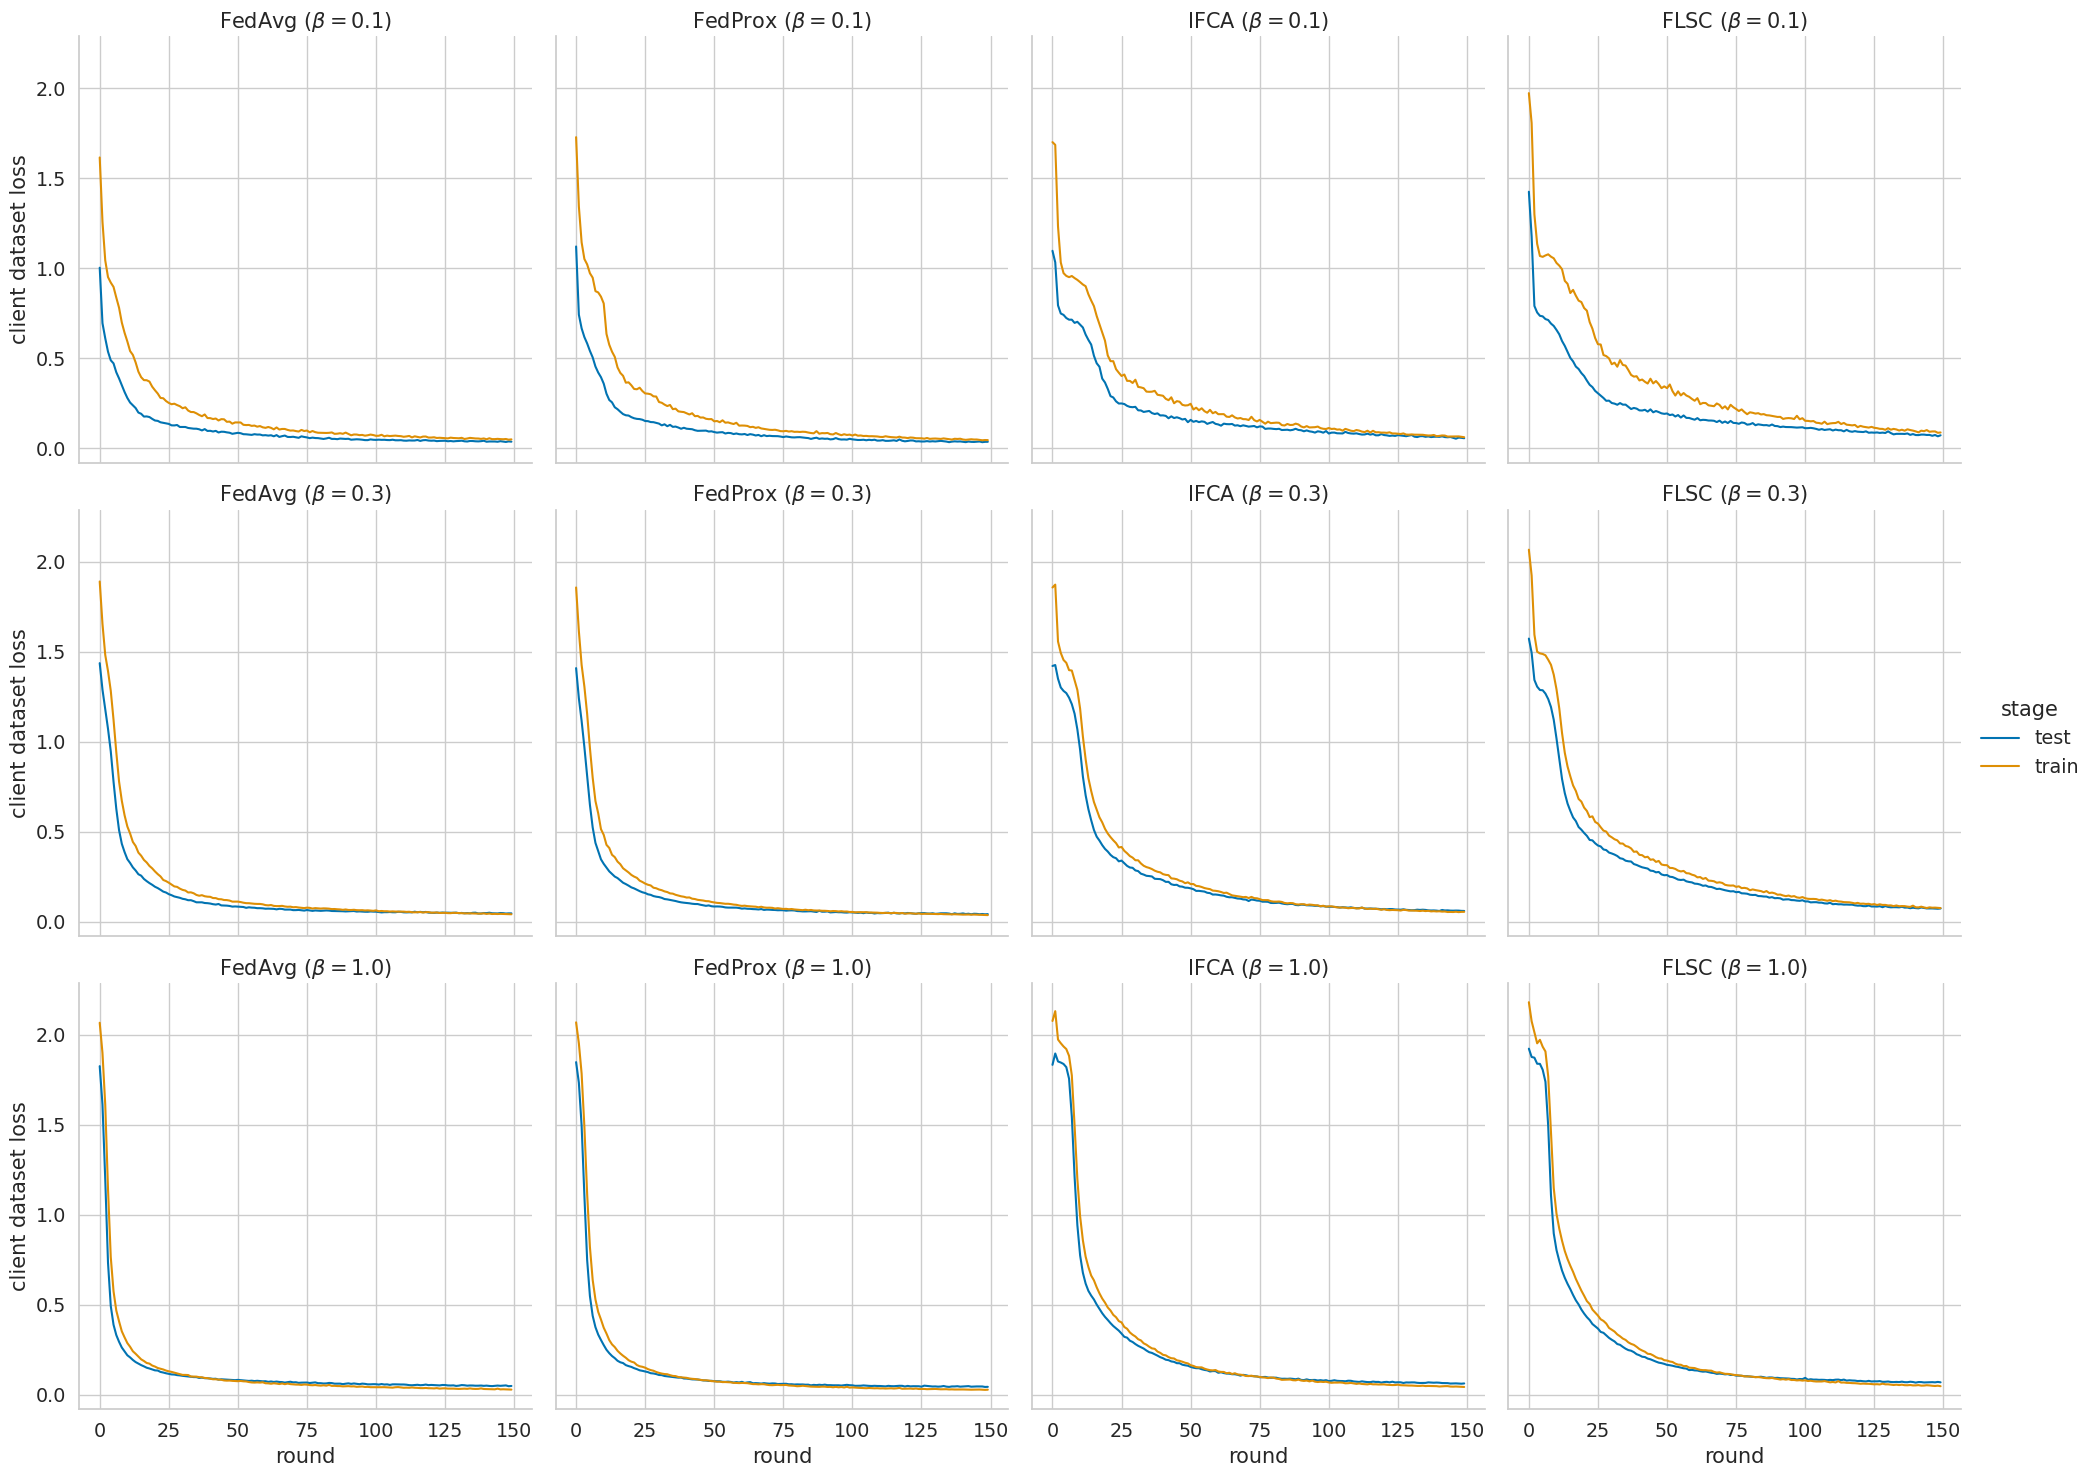

In [219]:
loss_plots(conn, data, weighted=WEIGHTED_AVERAGE).savefig(os.path.join(OUTPUT_DIR, "losses_mnist_label_distribution_imbalance.png"))

/home/lukas/Work/Masterthesis/masterthesis-clustered-fl/utils/model_evaluation/overall_performance.py:52: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  return sns.relplot(average_f1_data, x="round", y=y, col="algorithm", hue="beta", kind="line",


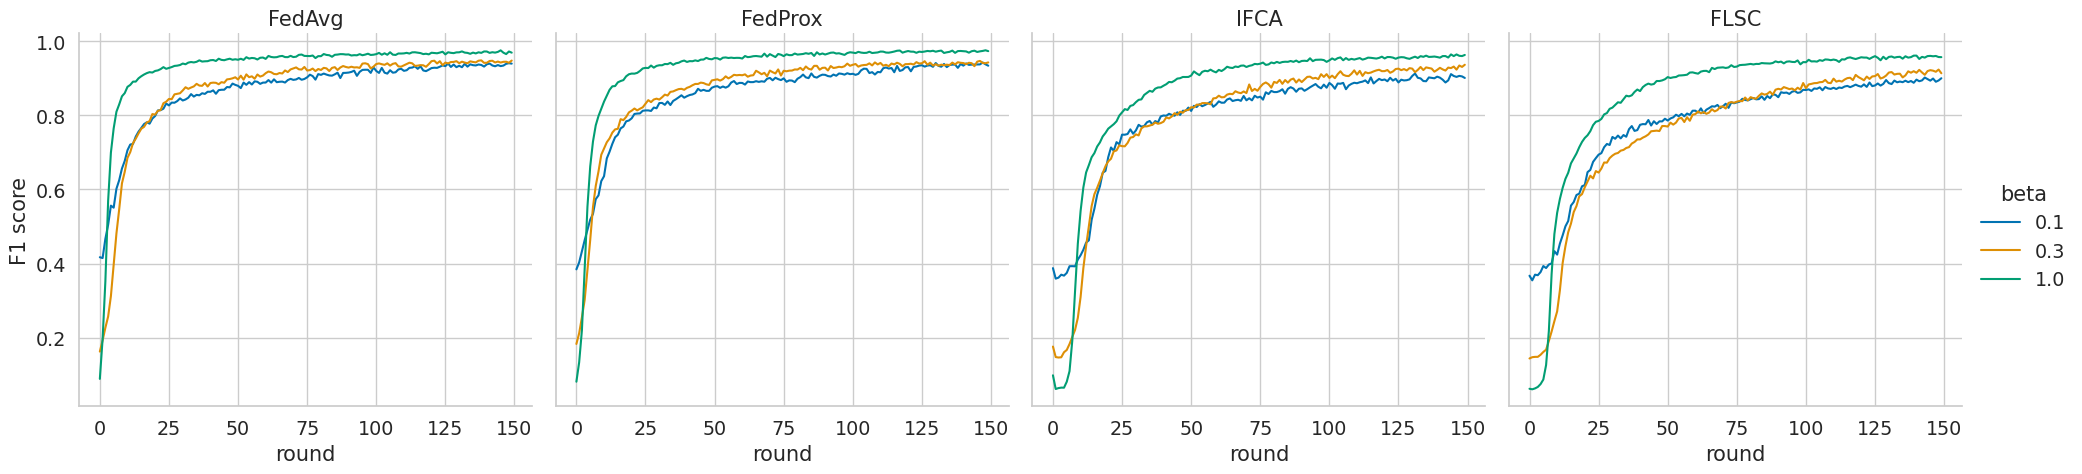

In [220]:
f1_plots(conn, data, weighted=WEIGHTED_AVERAGE).savefig(os.path.join(OUTPUT_DIR, "f1scores_mnist_label_distribution_imbalance.png"))

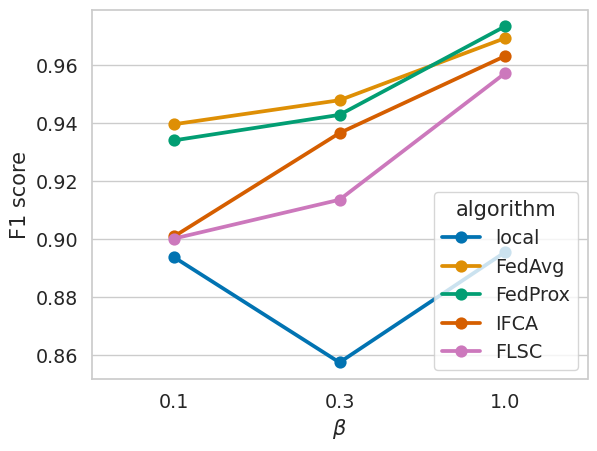

In [221]:
overall_f1_vs_imbalance_plots(conn, data, weighted=WEIGHTED_AVERAGE).savefig(os.path.join(OUTPUT_DIR, "final_f1scores_mnist_label_distribution_imbalance.png"))

In [222]:
conn.close()

## Feature (Distribution) Imbalance

### CIFAR-10

In [223]:
conn = connect_to_run(BENEFIT_FEATURE_DISTRIBUTION_CIFAR)
data = get_run_relation(conn)

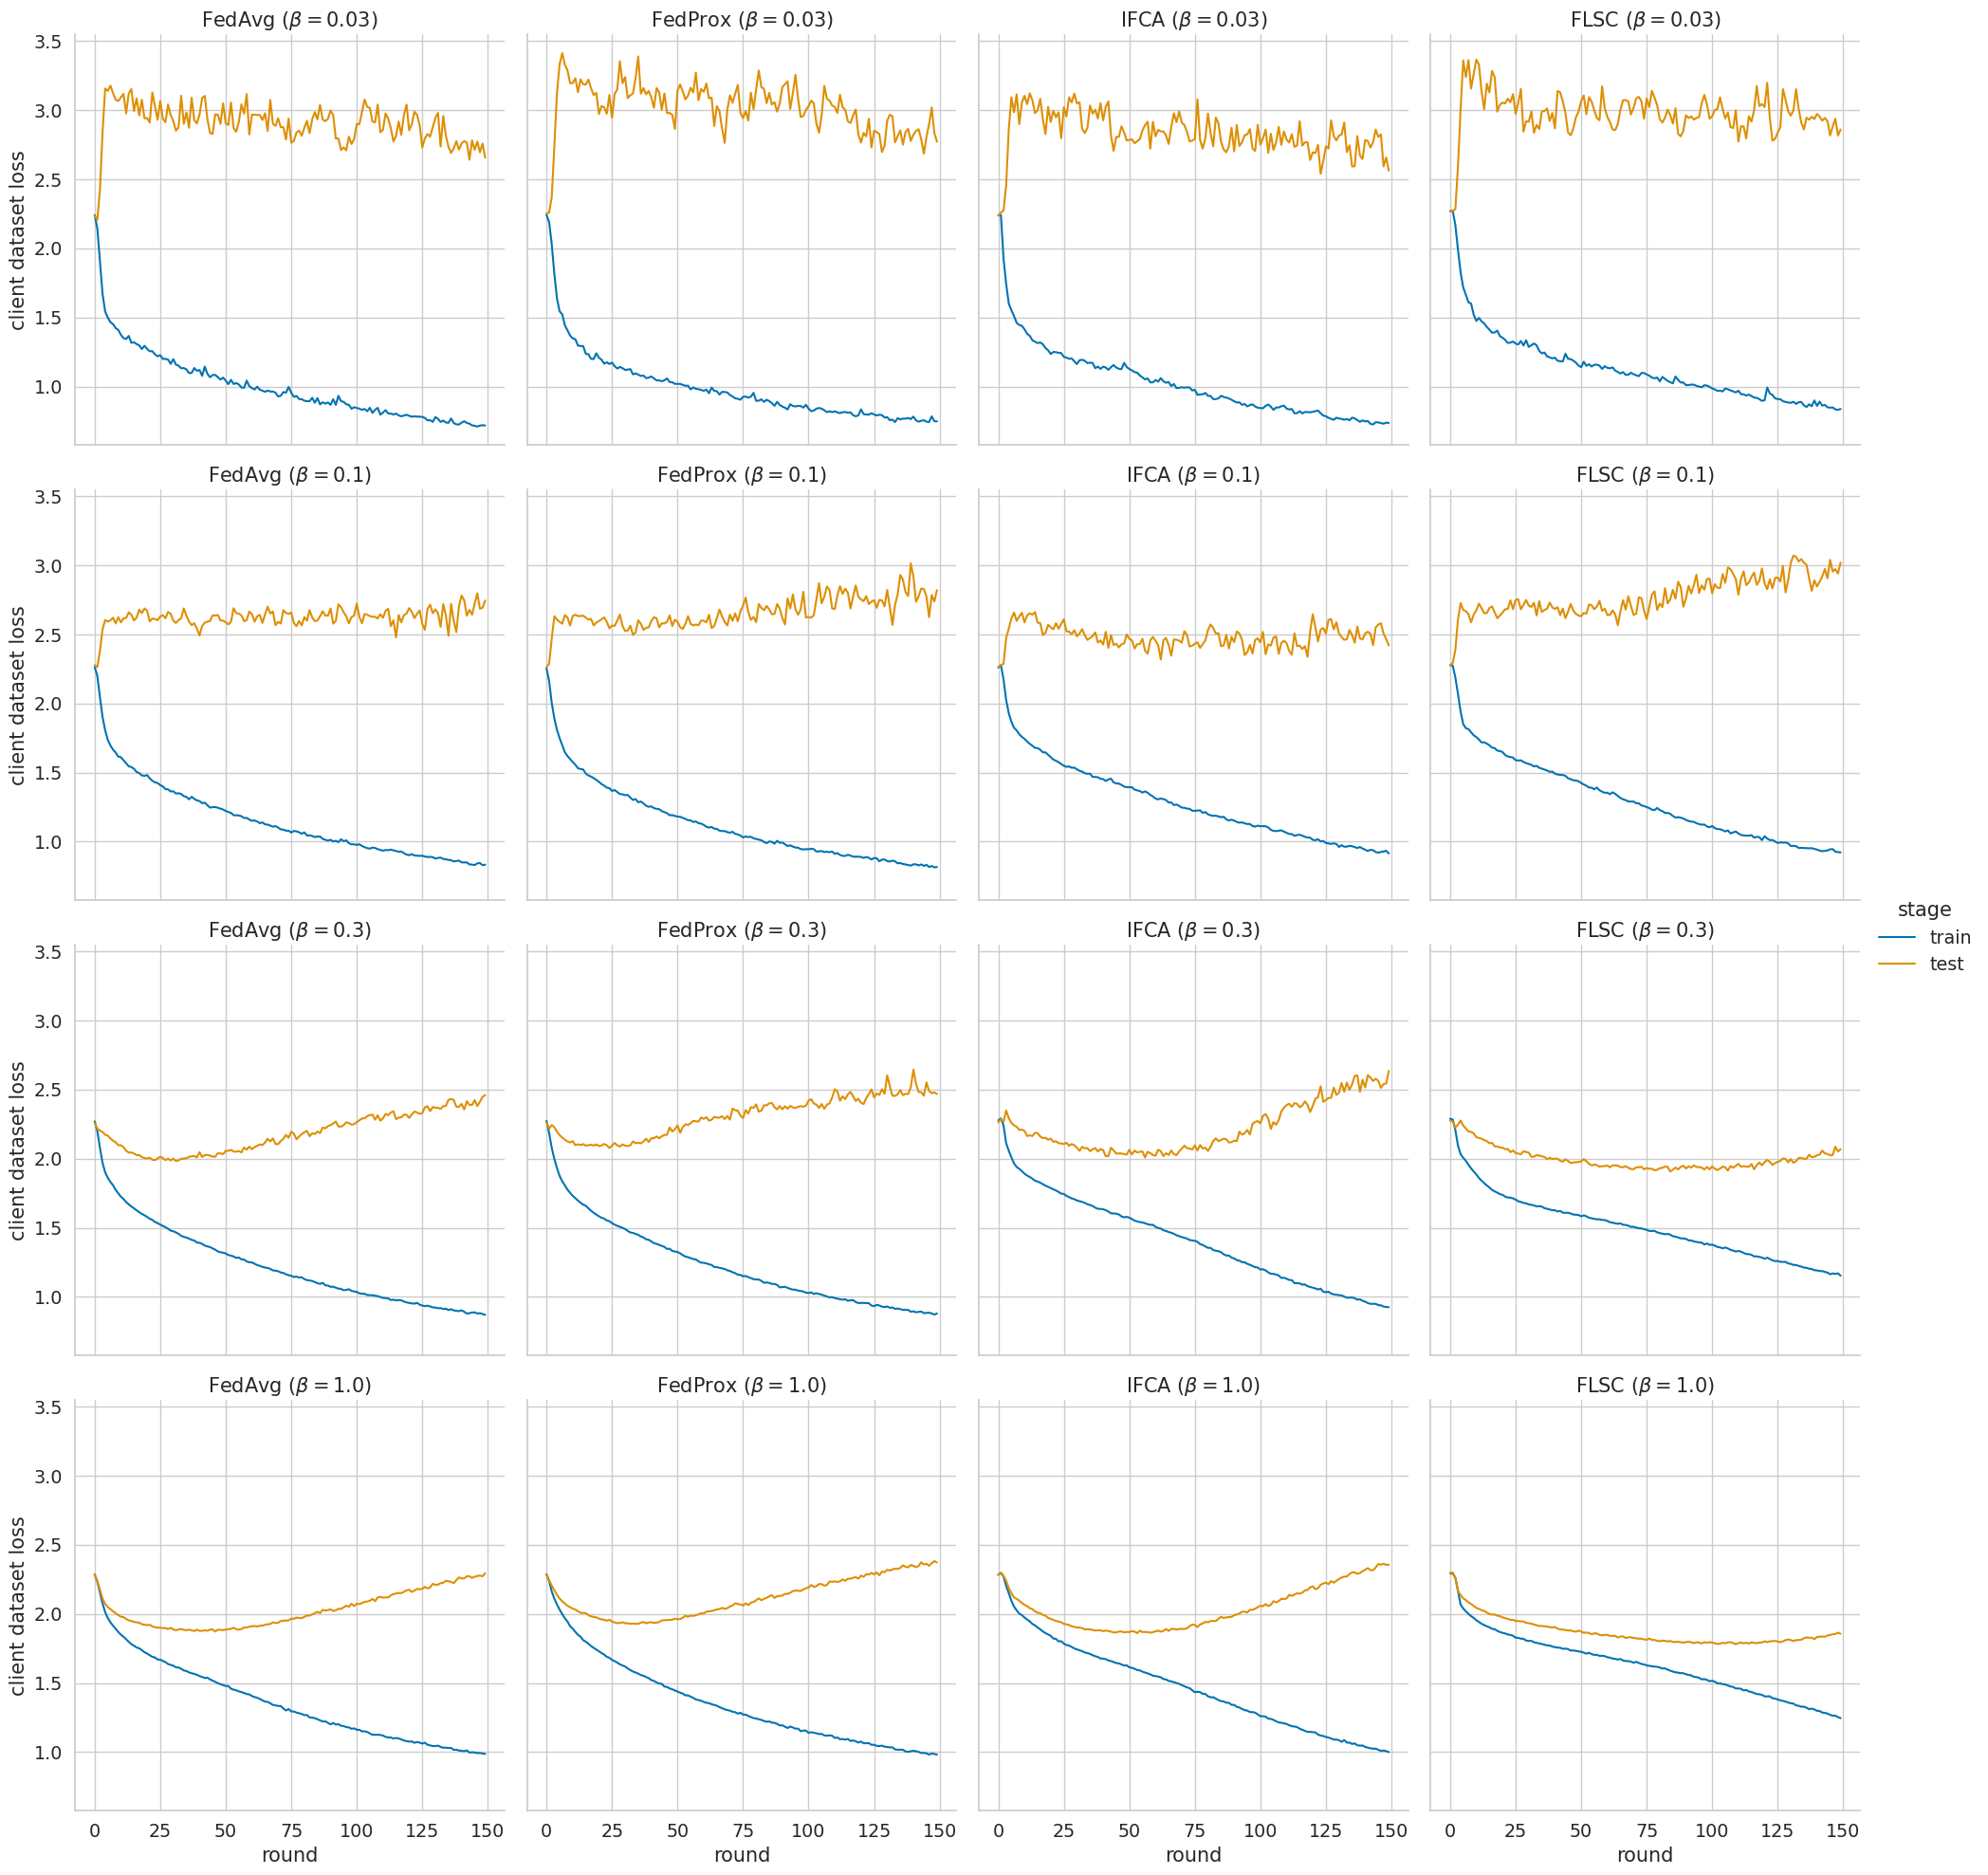

In [224]:
loss_plots(conn, data, weighted=WEIGHTED_AVERAGE).savefig(os.path.join(OUTPUT_DIR, "losses_cifar10_feature_distribution_imbalance.png"))

/home/lukas/Work/Masterthesis/masterthesis-clustered-fl/utils/model_evaluation/overall_performance.py:52: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  return sns.relplot(average_f1_data, x="round", y=y, col="algorithm", hue="beta", kind="line",


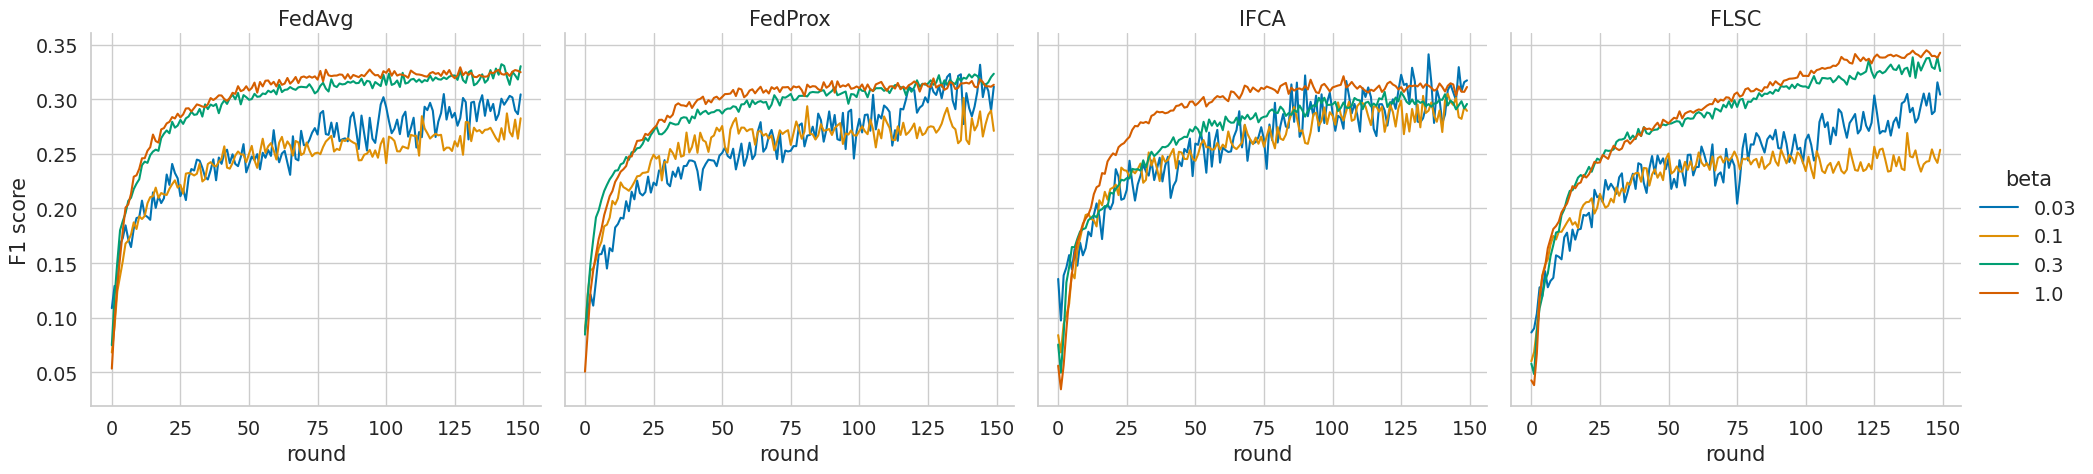

In [225]:
f1_plots(conn, data, weighted=WEIGHTED_AVERAGE).savefig(os.path.join(OUTPUT_DIR, "f1scores_cifar10_feature_distribution_imbalance.png"))

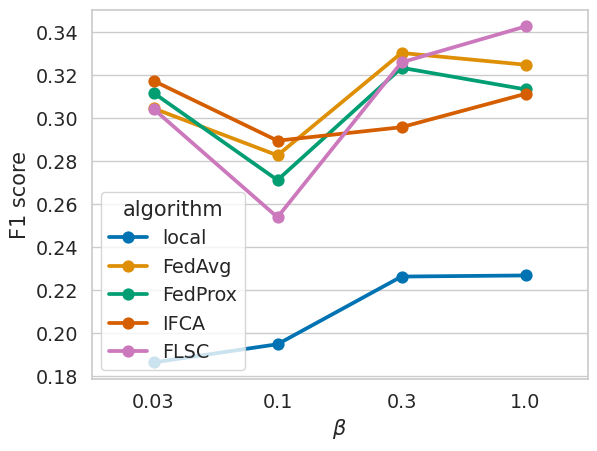

In [226]:
overall_f1_vs_imbalance_plots(conn, data, weighted=WEIGHTED_AVERAGE).savefig(os.path.join(OUTPUT_DIR, "final_f1scores_cifar10_feature_distribution_imbalance.png"))

In [227]:
conn.close()

### MNIST

In [228]:
conn = connect_to_run(BENEFIT_FEATURE_DISTRIBUTION_MNIST)
data = get_run_relation(conn)

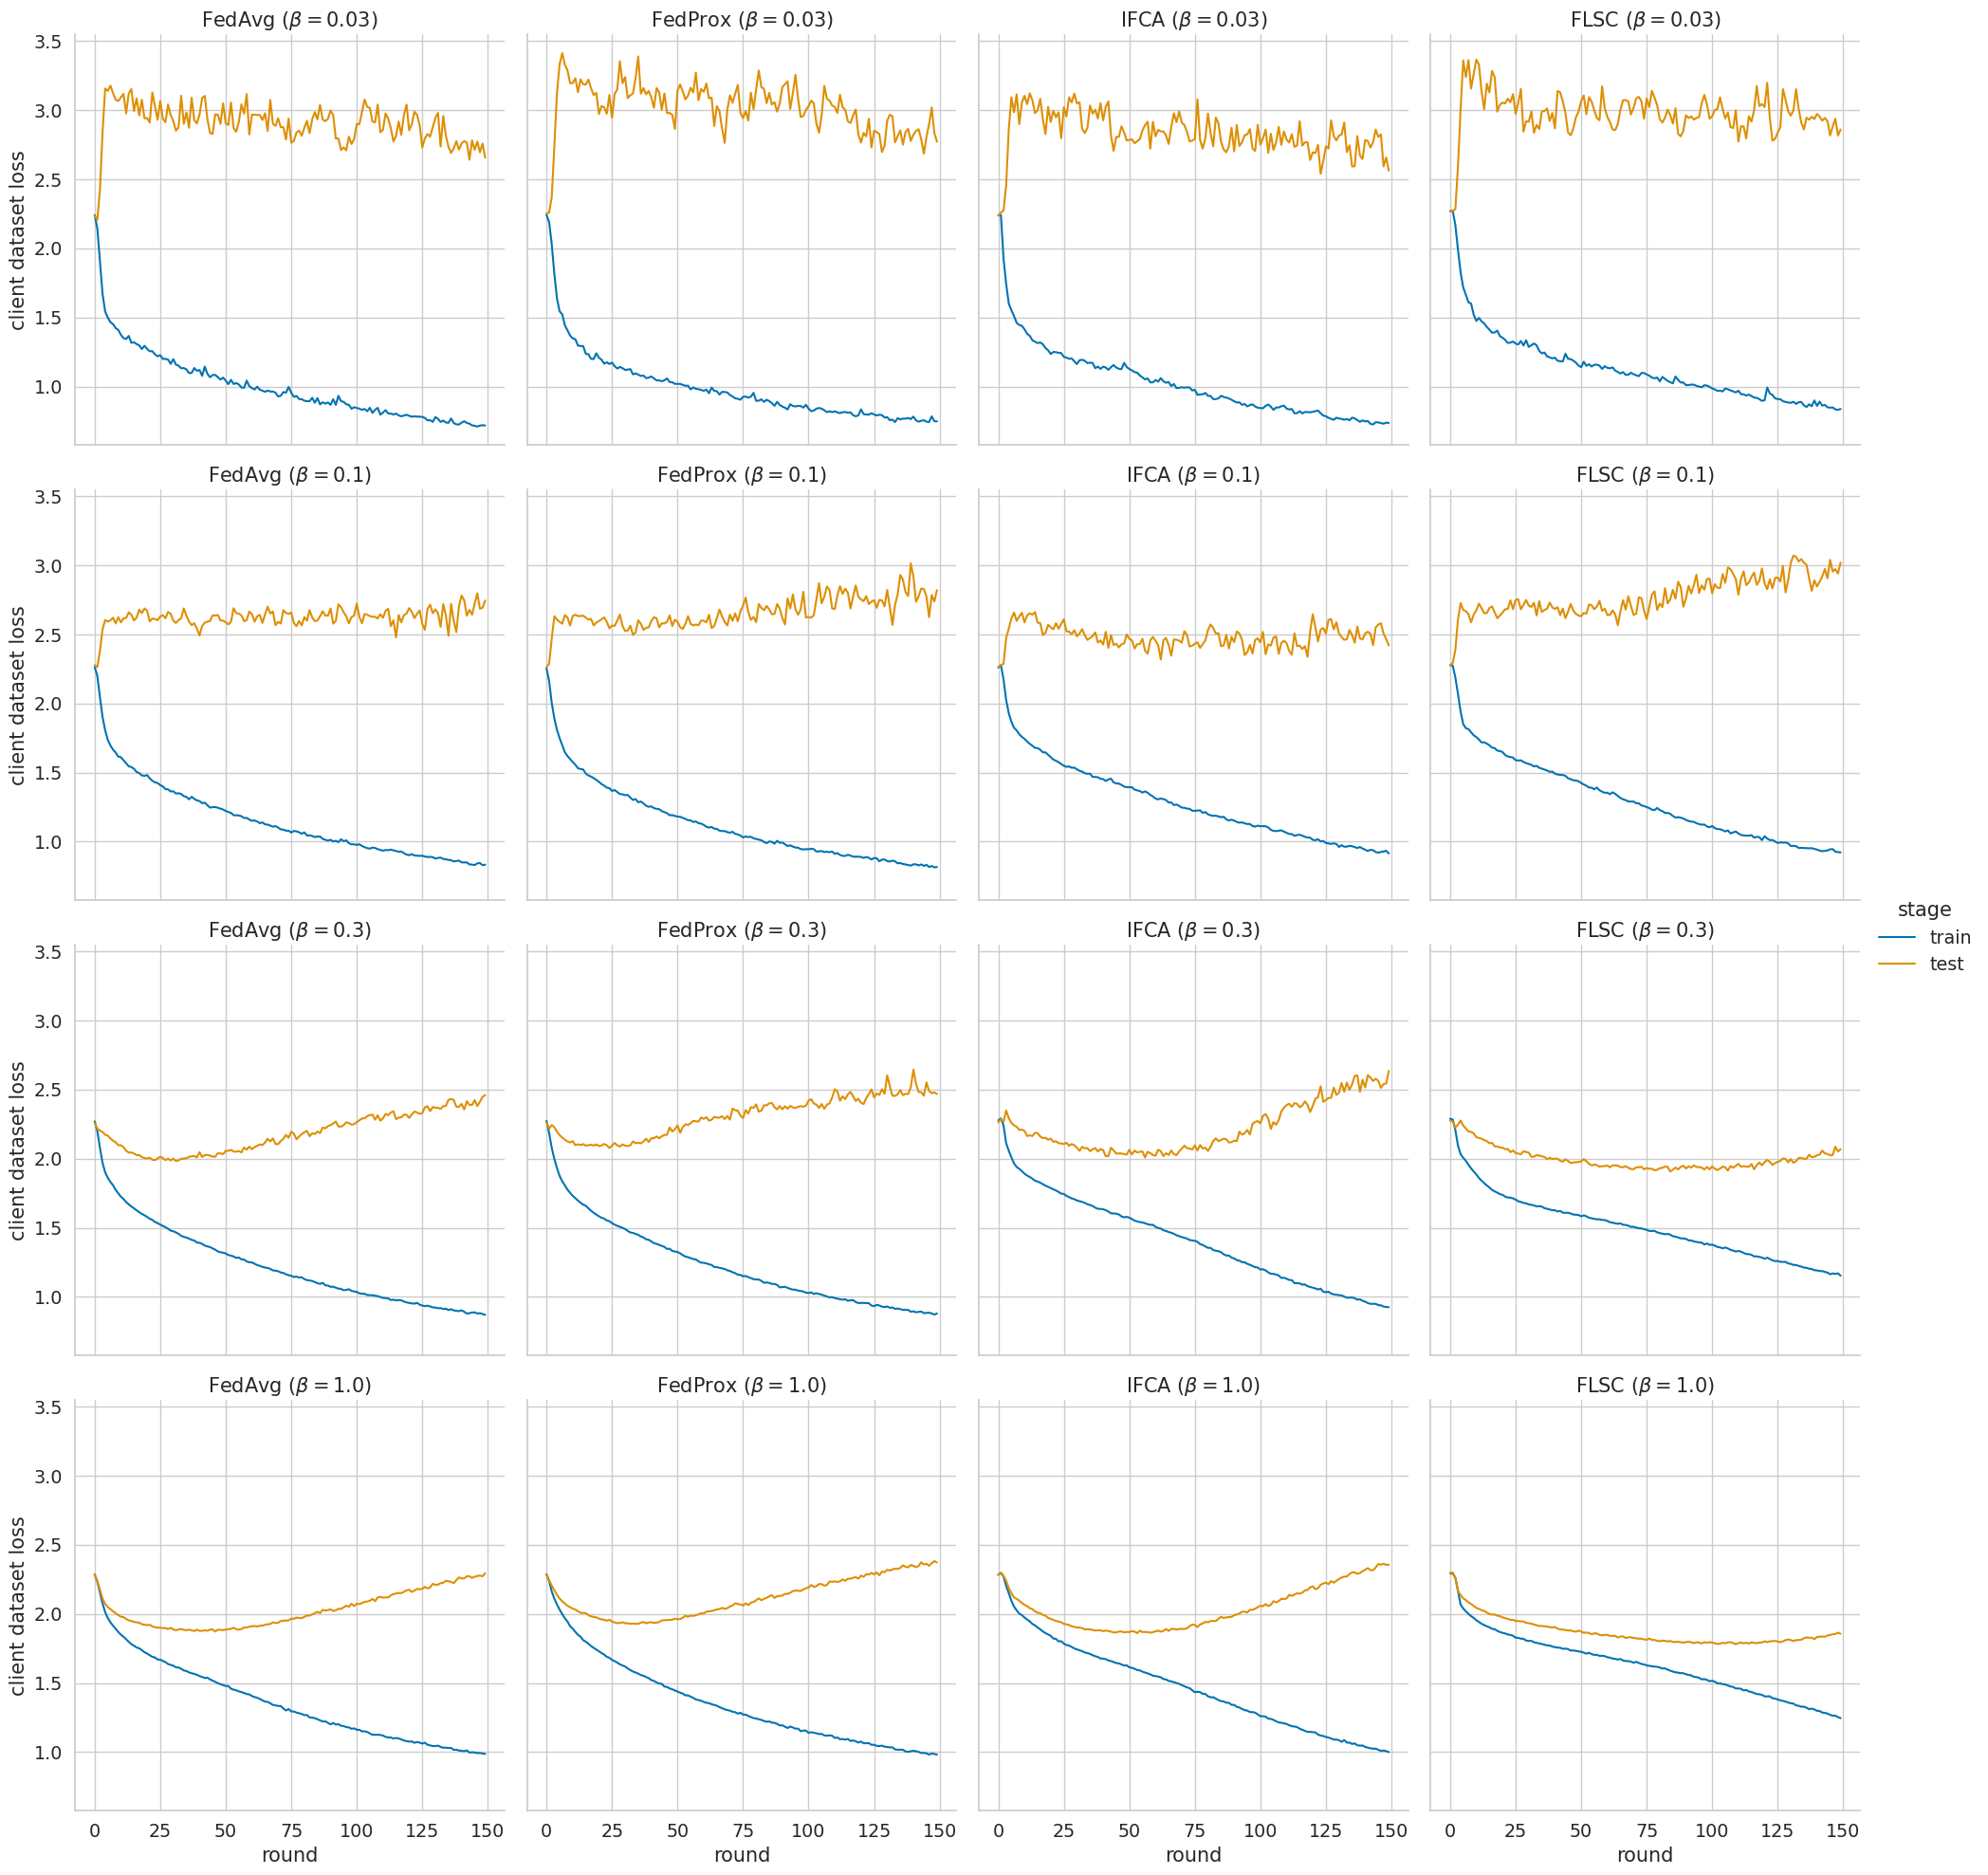

In [229]:
loss_plots(conn, data, weighted=WEIGHTED_AVERAGE).savefig(os.path.join(OUTPUT_DIR, "losses_mnist_feature_distribution_imbalance.png"))

/home/lukas/Work/Masterthesis/masterthesis-clustered-fl/utils/model_evaluation/overall_performance.py:52: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  return sns.relplot(average_f1_data, x="round", y=y, col="algorithm", hue="beta", kind="line",


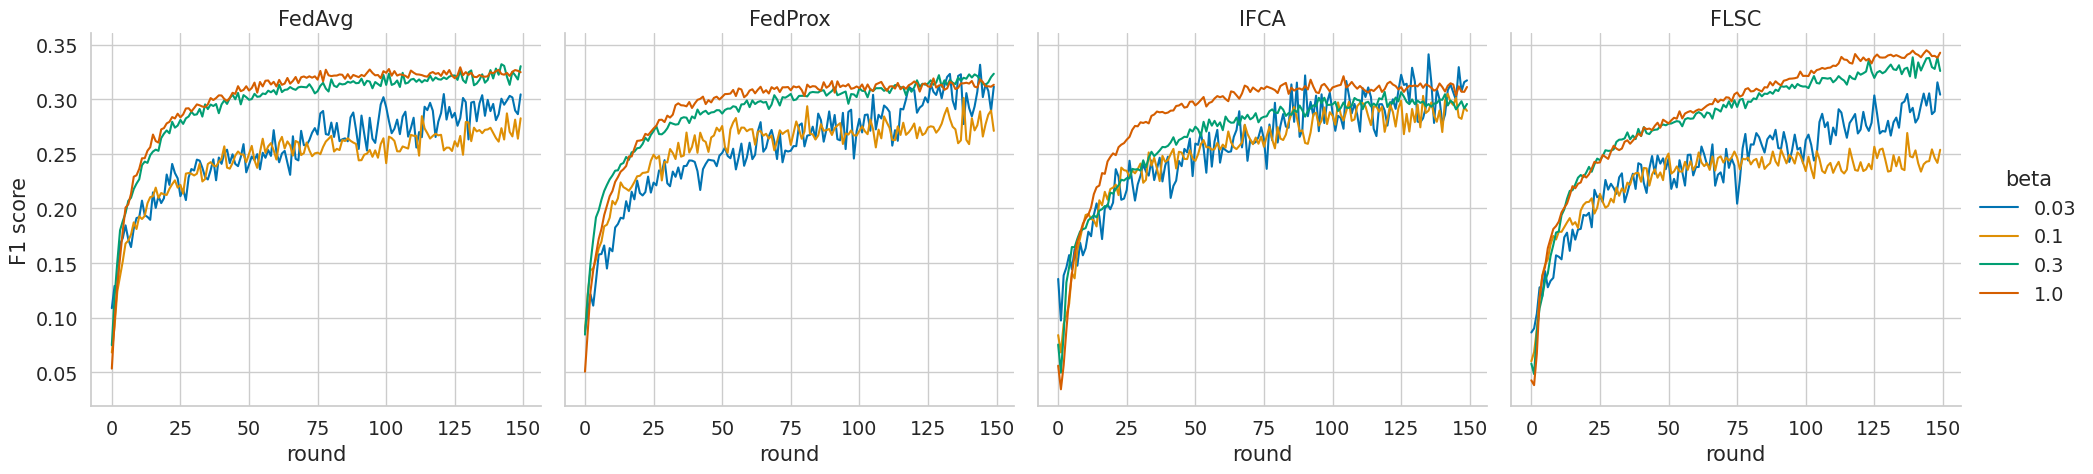

In [230]:
f1_plots(conn, data, weighted=WEIGHTED_AVERAGE).savefig(os.path.join(OUTPUT_DIR, "f1scores_mnist_feature_distribution_imbalance.png"))

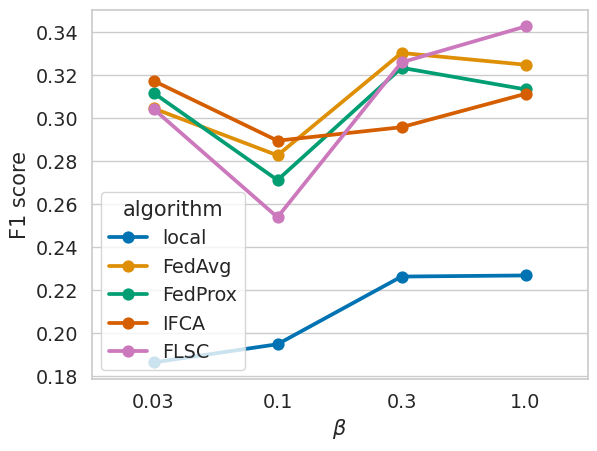

In [231]:
overall_f1_vs_imbalance_plots(conn, data, weighted=WEIGHTED_AVERAGE).savefig(os.path.join(OUTPUT_DIR, "final_f1scores_mnist_feature_distribution_imbalance.png"))

In [232]:
conn.close()

# Client Benefit

## Quantity Imbalance

### CIFAR-10

In [233]:
conn = connect_to_run(BENEFIT_QUANTITY_CIFAR)
data = get_run_relation(conn)

In [234]:
benefits = compute_client_benefit(conn, data)

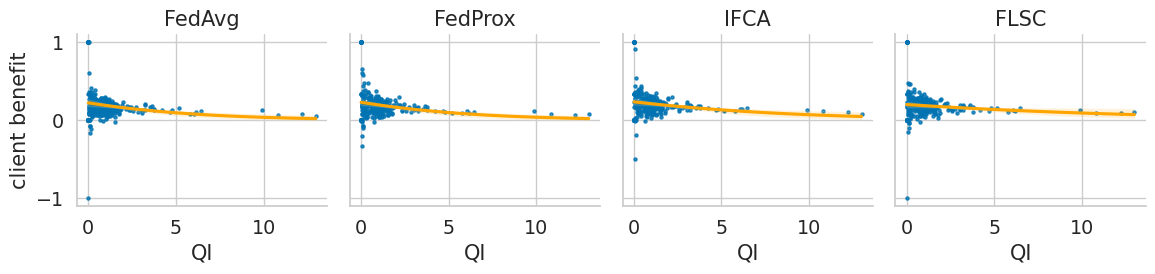

In [235]:
benefit_imbalance_plots(benefits, measure='quantity_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_quantity_imbalance_cifar10.png"))

In [236]:
log_table(benefit_imbalance_reg_quantity(benefits), "Quantity Imbalance on CIFAR-10/quantity")

algorithm  intercept   p_intercept  beta_log(QI)      p_QI   adj_Rsq
0    FedAvg   0.164580  1.783513e-27     -0.027555  0.000021  0.046815
1      FLSC   0.178076  1.658573e-35     -0.009353  0.111906  0.004270
2   FedProx   0.171361  1.068080e-30     -0.026978  0.000018  0.047594
3      IFCA   0.192745  2.808048e-38     -0.019678  0.001251  0.025996

In [237]:
log_table(benefit_imbalance_reg_label(benefits), "Label Imbalance on CIFAR-10/quantity")

algorithm  intercept   beta_LI      p_LI  beta_LDI     p_LDI   adj_Rsq
0    FedAvg   0.172722 -0.006706  0.460874  0.381679  0.000003  0.054223
1      FLSC   0.182824 -0.002194  0.794127  0.106609  0.152140  0.000170
2   FedProx   0.176101 -0.003349  0.706038  0.337074  0.000022  0.044068
3      IFCA   0.197387 -0.002344  0.787086  0.231060  0.002764  0.019456

/home/lukas/Work/Masterthesis/masterthesis-clustered-fl/.venv/lib64/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/lukas/Work/Masterthesis/masterthesis-clustered-fl/.venv/lib64/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/lukas/Work/Masterthesis/masterthesis-clustered-fl/.venv/lib64/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/lukas/Work/Masterthesis/masterthesis-clustered-fl/.venv/lib64/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/lukas/Work/Masterthesis/masterthesis-clustered-fl/.venv/lib64/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/lukas/Work/Mas

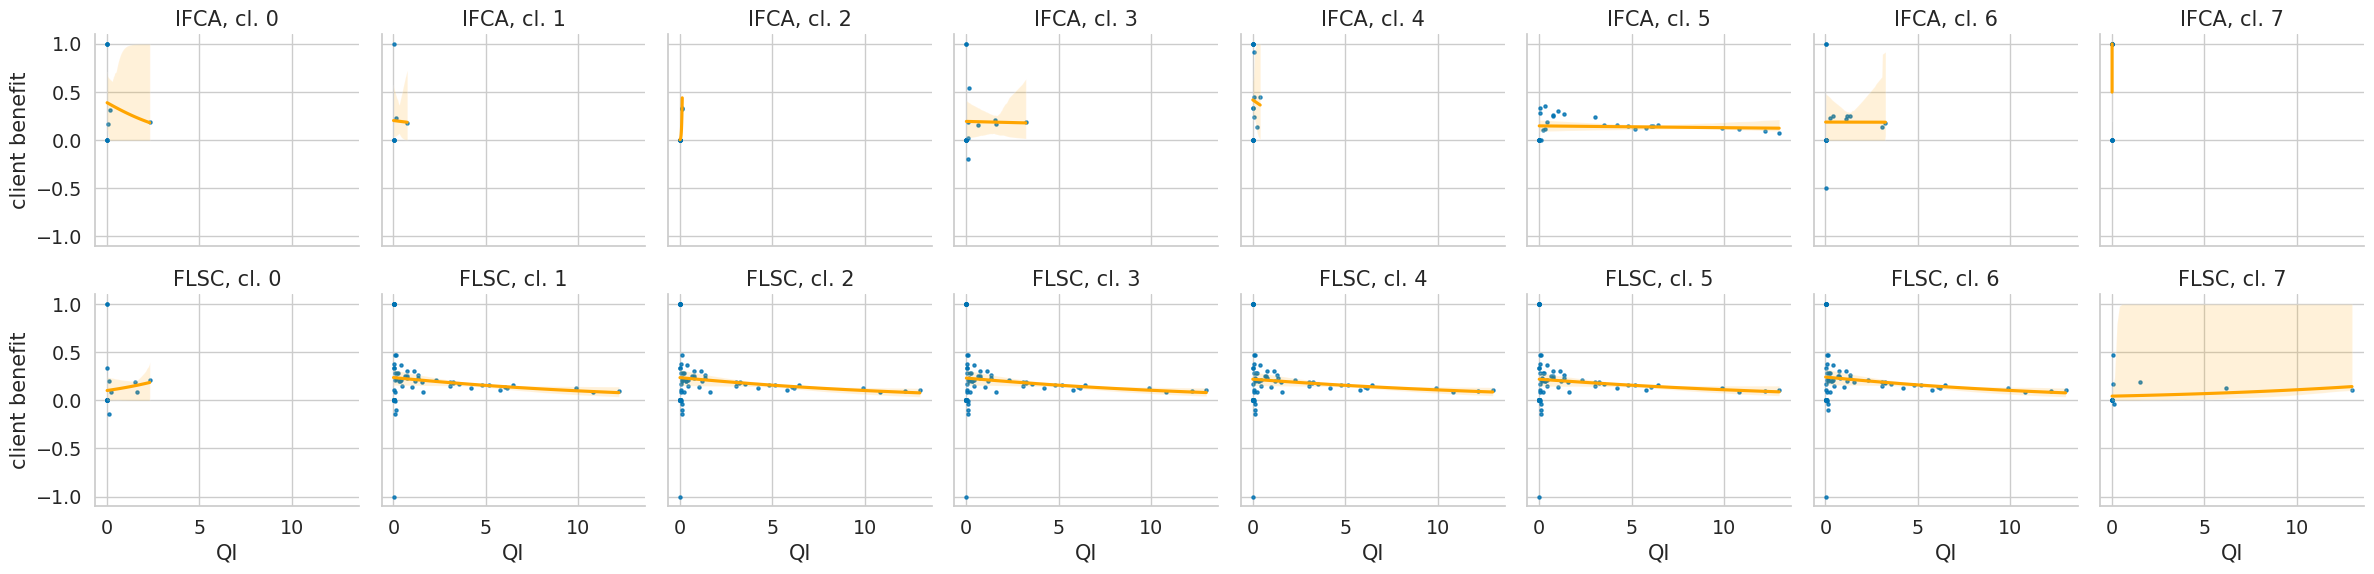

In [238]:
benefit_imbalance_cluster_plots(benefits, measure='quantity_imbalance', imbalance_value=0.1).savefig(os.path.join(OUTPUT_DIR, "benefits_quantity_imbalance_cifar10_clusters.png"))

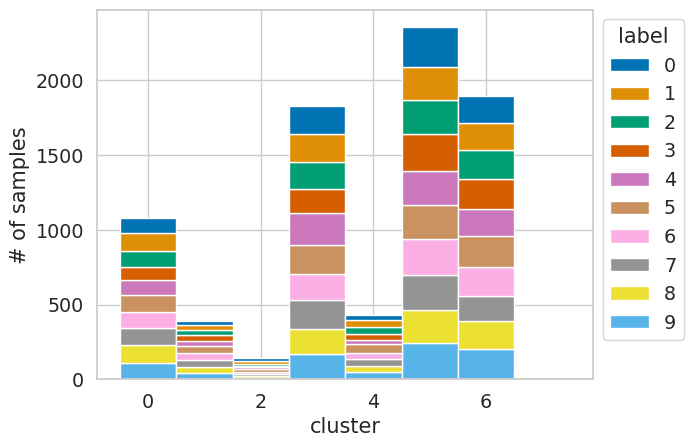

In [239]:
benefit_cluster_histogram(benefits, imbalance_value=0.1, algorithm="IFCA", by="label").savefig(os.path.join(OUTPUT_DIR, "benefits_quantity_imbalance_cifar10_clusters_histogram.png"))

In [240]:
benefits.explode('client_labels').client_labels.unique()

array([9, 3, 5, 6, 4, 2, 7, 1, 8, 0], dtype=object)

### MNIST

In [241]:
conn = connect_to_run(BENEFIT_QUANTITY_MNIST)
data = get_run_relation(conn)

In [242]:
benefits = compute_client_benefit(conn, data)

<Axes: title={'center': 'Quantity vs. label imbalance'}, xlabel='QI', ylabel='LI'>

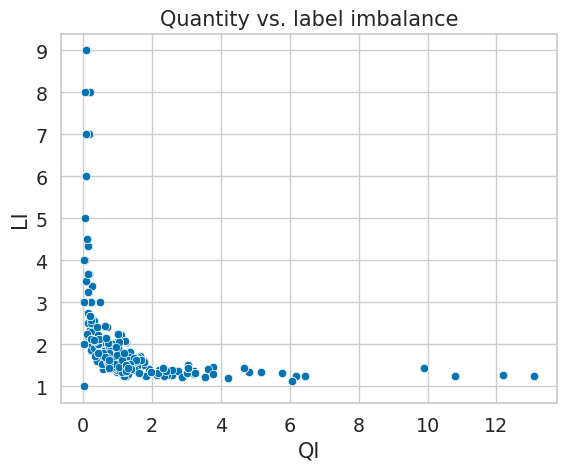

In [243]:
fig = sns.scatterplot(data=benefits, x='quantity_imbalance', y='label_imbalance')
fig.set(xlabel='QI', ylabel='LI', title='Quantity vs. label imbalance')
fig.get_figure().savefig(os.path.join(OUTPUT_DIR, "quantity_vs_label_imbalance_quantity_skew_mnist.png"))
fig

<Axes: title={'center': 'Quantity vs. label distribution imbalance'}, xlabel='QI', ylabel='LI'>

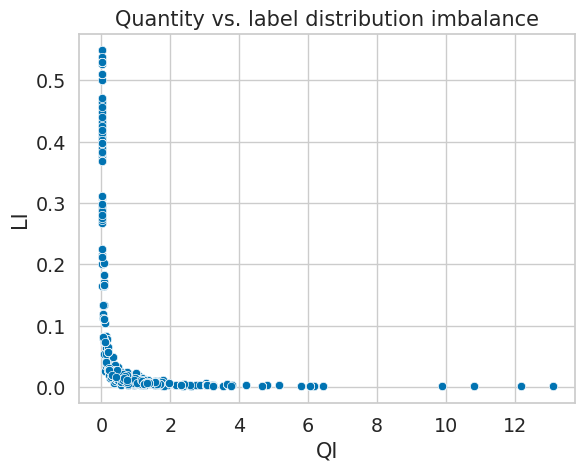

In [244]:
fig = sns.scatterplot(data=benefits, x='quantity_imbalance', y='label_distribution_imbalance')
fig.set(xlabel='QI', ylabel='LI', title='Quantity vs. label distribution imbalance')
fig.get_figure().savefig(os.path.join(OUTPUT_DIR, "quantity_vs_label_distribution_imbalance_quantity_skew_mnist.png"))
fig

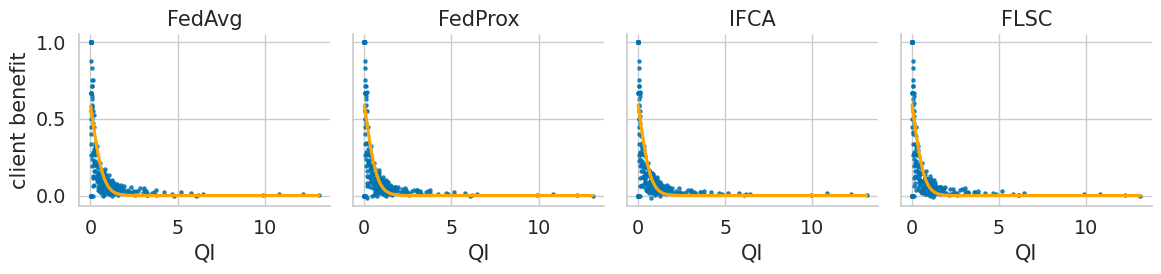

In [245]:
benefit_imbalance_plots(benefits, measure='quantity_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_quantity_imbalance_mnist.png"))

In [246]:
log_table(benefit_imbalance_reg_quantity(benefits), "Quantity Imbalance on MNIST/quantity")

algorithm  intercept   p_intercept  beta_log(QI)          p_QI   adj_Rsq
0   FedProx   0.086011  1.504283e-10     -0.136760  7.900825e-75  0.607069
1      FLSC   0.083422  4.313104e-10     -0.137530  1.107851e-75  0.611350
2      IFCA   0.083532  4.439125e-10     -0.137246  2.746418e-75  0.609378
3    FedAvg   0.087978  9.190163e-11     -0.134539  2.509831e-72  0.594241

In [247]:
log_table(benefit_imbalance_reg_label(benefits), "Label Imbalance on MNIST/quantity")

algorithm  intercept   beta_LI      p_LI  beta_LDI         p_LDI   adj_Rsq
0   FedProx   0.047068  0.025686  0.016934  1.587633  7.451131e-51  0.482745
1      FLSC   0.046181  0.025000  0.020248  1.593977  4.773266e-51  0.483551
2      IFCA   0.049498  0.023300  0.030664  1.593212  6.816767e-51  0.481382
3    FedAvg   0.041865  0.029975  0.005820  1.541807  4.108196e-48  0.467094

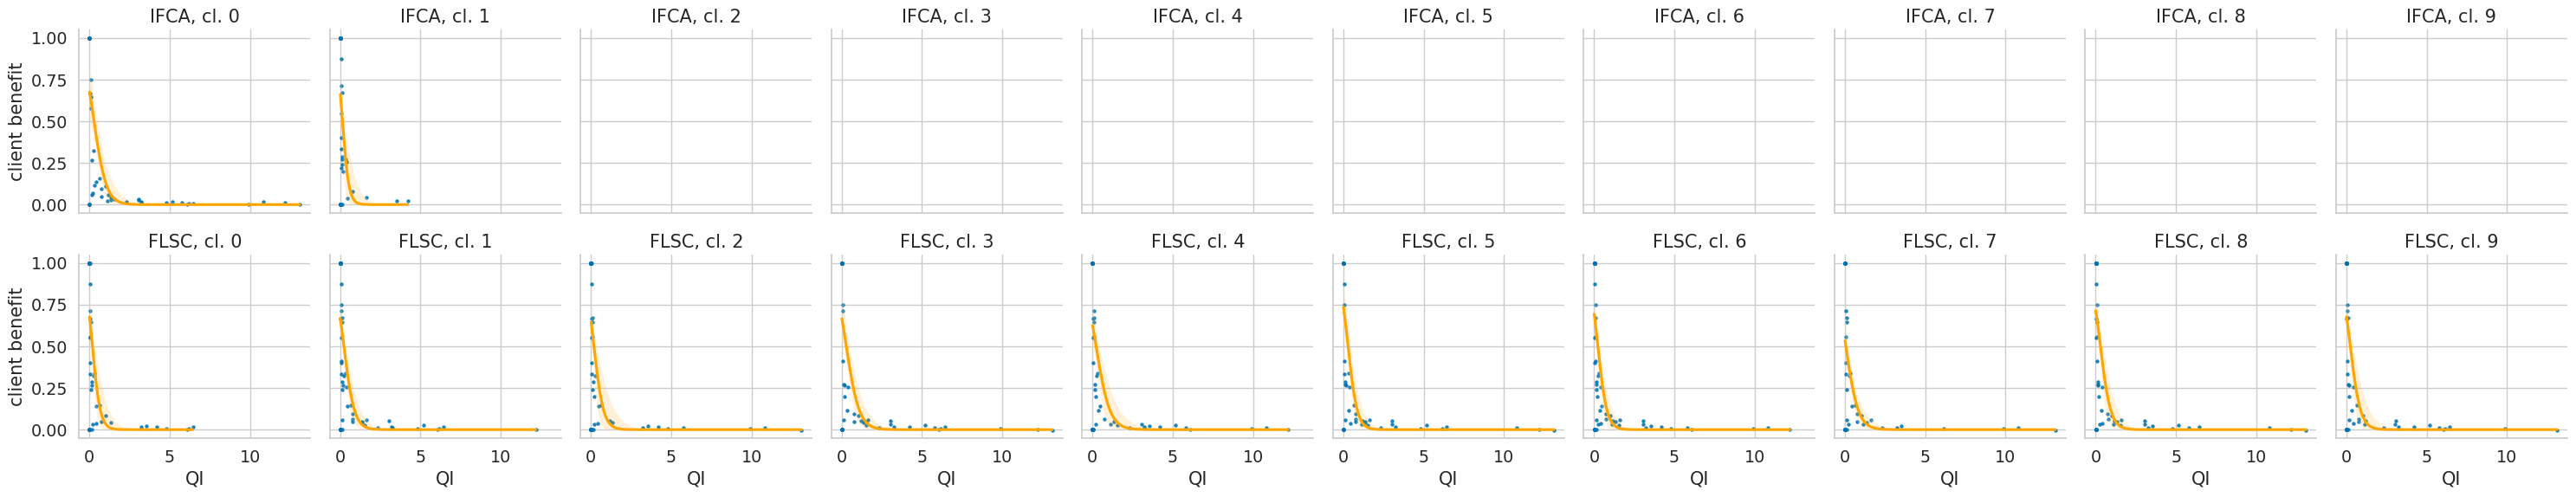

In [248]:
benefit_imbalance_cluster_plots(benefits, measure='quantity_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_quantity_imbalance_mnist_clusters.png"))

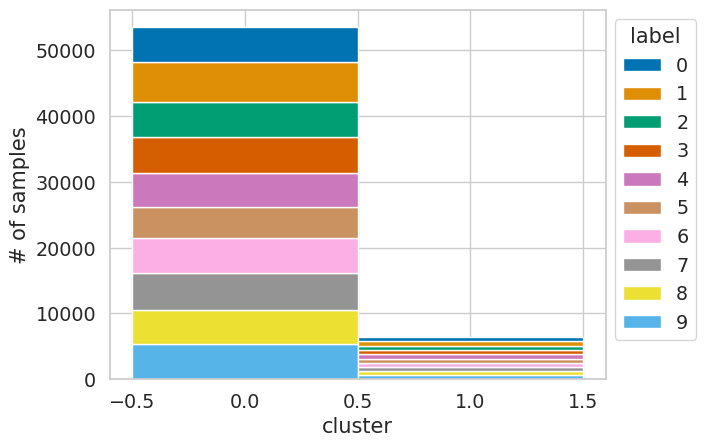

In [249]:
benefit_cluster_histogram(benefits, imbalance_value=0.1, algorithm="IFCA", by="label").savefig(os.path.join(OUTPUT_DIR, "benefits_quantity_imbalance_mnist_clusters_histogram.png"))

## Label (Distribution) Imbalance

### CIFAR-10

In [250]:
conn = connect_to_run(BENEFIT_LABEL_DISTRIBUTION_CIFAR)
data = get_run_relation(conn)

In [251]:
benefits = compute_client_benefit(conn, data)

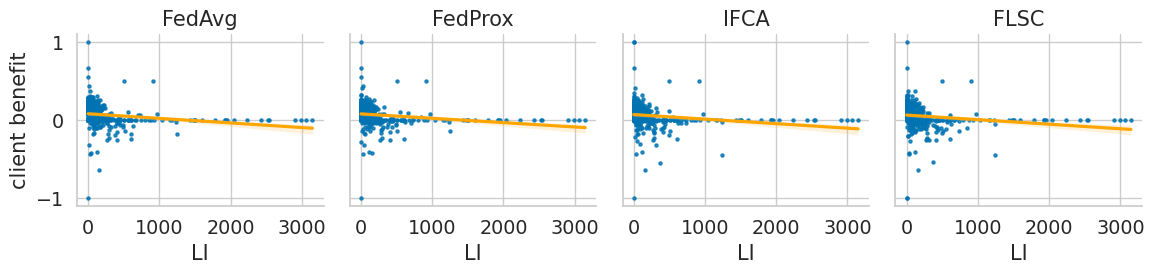

In [252]:
benefit_imbalance_plots(benefits, measure='label_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_label_imbalance_cifar10.png"))

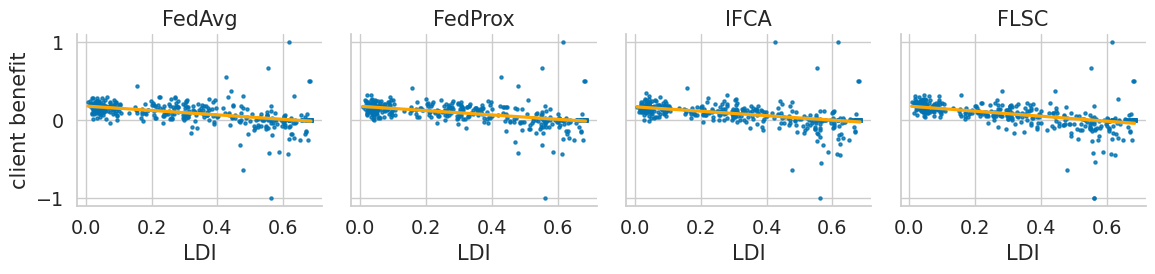

In [253]:
benefit_imbalance_plots(benefits, measure='label_distribution_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_label_distribution_imbalance_cifar10.png"))

In [254]:
log_table(benefit_imbalance_reg_quantity(benefits), "Quantity Imbalance on CIFAR-10/label")

algorithm  intercept   p_intercept  beta_log(QI)      p_QI   adj_Rsq
0    FedAvg   0.082116  7.658757e-29      0.014889  0.000159  0.027388
1      IFCA   0.070004  9.896974e-21      0.012295  0.002597  0.016764
2      FLSC   0.066794  1.384236e-17      0.016845  0.000092  0.029495
3   FedProx   0.081593  8.727706e-31      0.015621  0.000035  0.033256

In [255]:
log_table(benefit_imbalance_reg_label(benefits), "Label Imbalance on CIFAR-10/label")

algorithm  intercept   beta_LI      p_LI  beta_LDI         p_LDI   adj_Rsq
0    FedAvg   0.182879  0.000002  0.900522 -0.284161  3.023946e-28  0.249860
1      IFCA   0.173420  0.000003  0.827975 -0.287016  7.356454e-27  0.237398
2      FLSC   0.182047  0.000012  0.411909 -0.329975  5.442334e-32  0.271649
3   FedProx   0.179876  0.000004  0.764544 -0.280285  4.744573e-30  0.262254

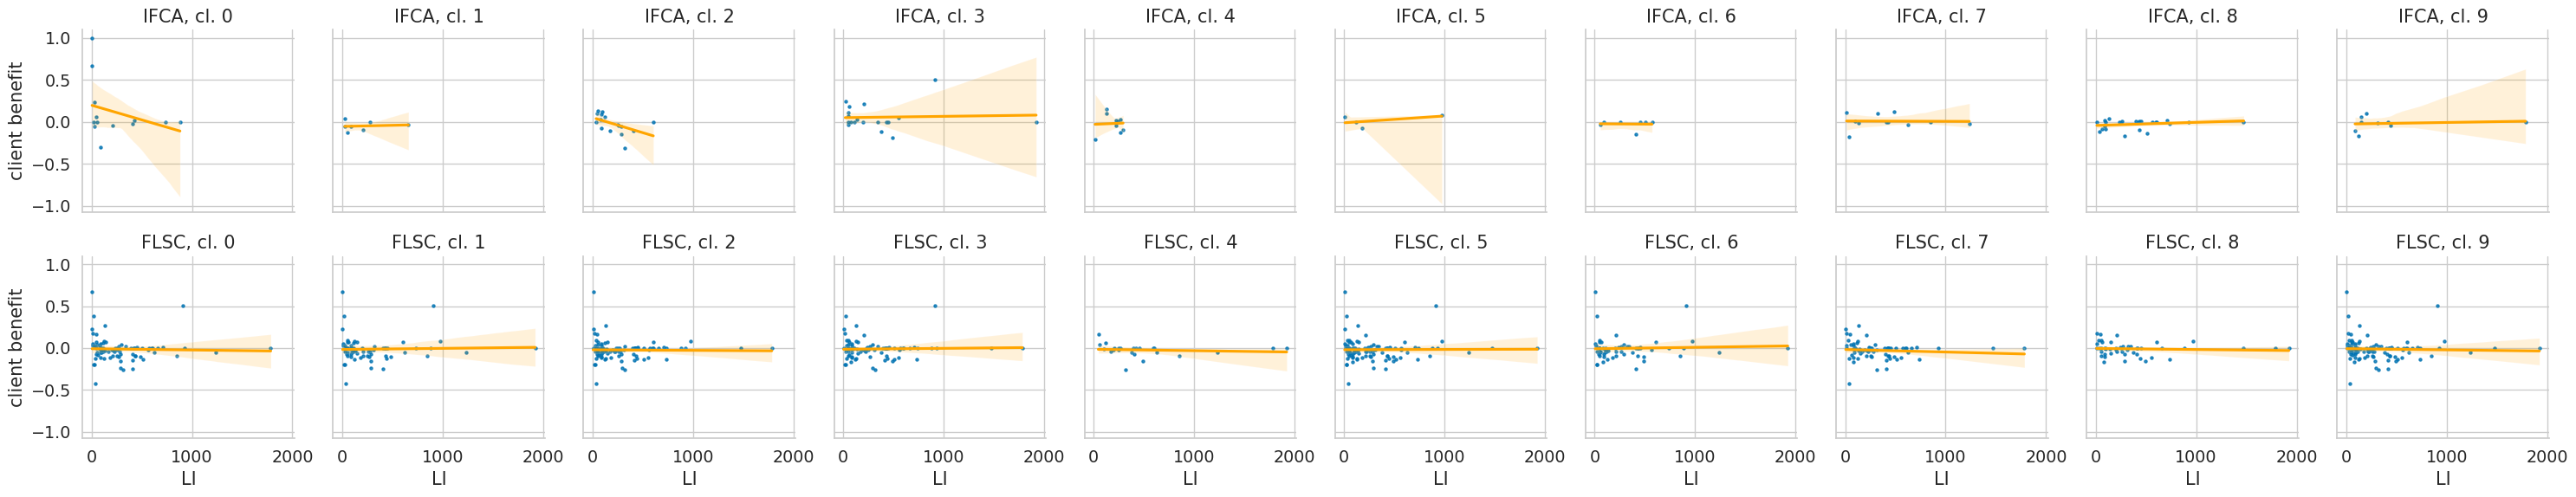

In [256]:
benefit_imbalance_cluster_plots(benefits, measure='label_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_label_imbalance_cifar10_clusters.png"))

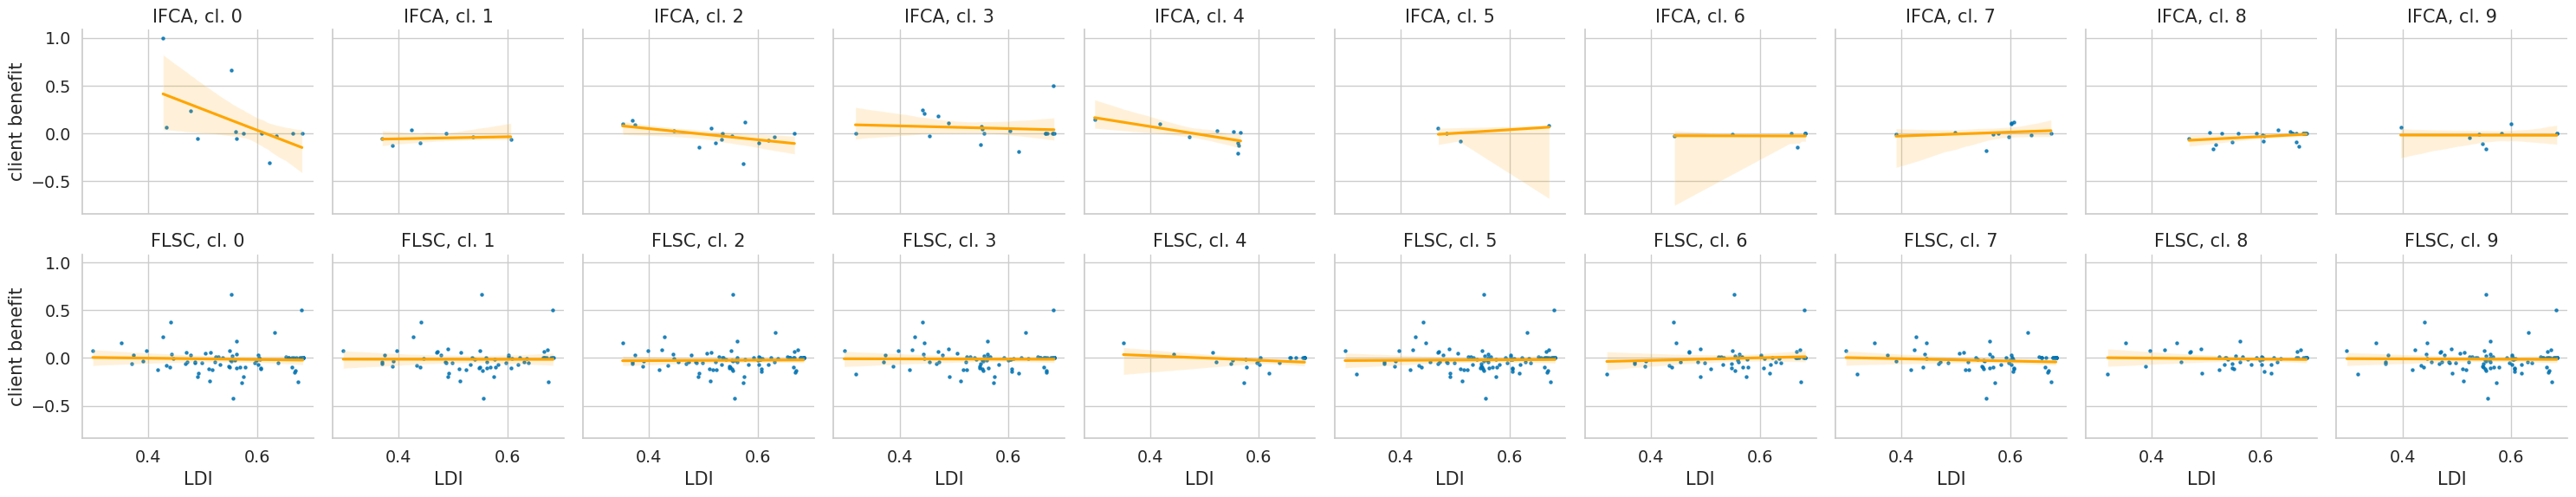

In [257]:
benefit_imbalance_cluster_plots(benefits, measure='label_distribution_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_label_distribution_imbalance_cifar10_clusters.png"))

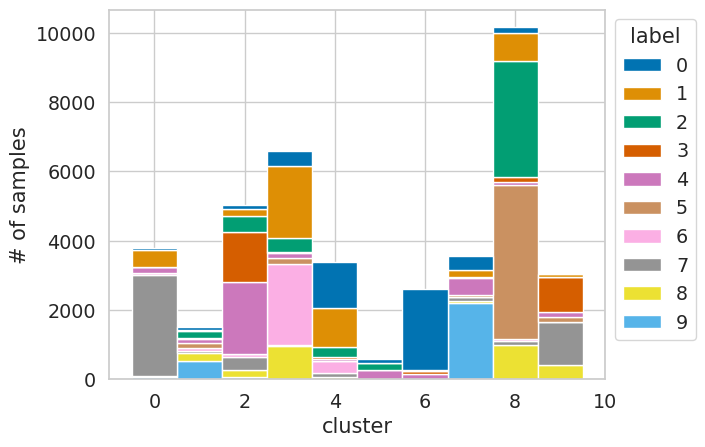

In [258]:
benefit_cluster_histogram(benefits, imbalance_value=0.1, algorithm="IFCA", by="label").savefig(os.path.join(OUTPUT_DIR, "benefits_label_distribution_imbalance_cifar10_clusters_histogram.png"))

### MNIST

In [259]:
conn = connect_to_run(BENEFIT_LABEL_DISTRIBUTION_MNIST)
data = get_run_relation(conn)

In [260]:
benefits = compute_client_benefit(conn, data)

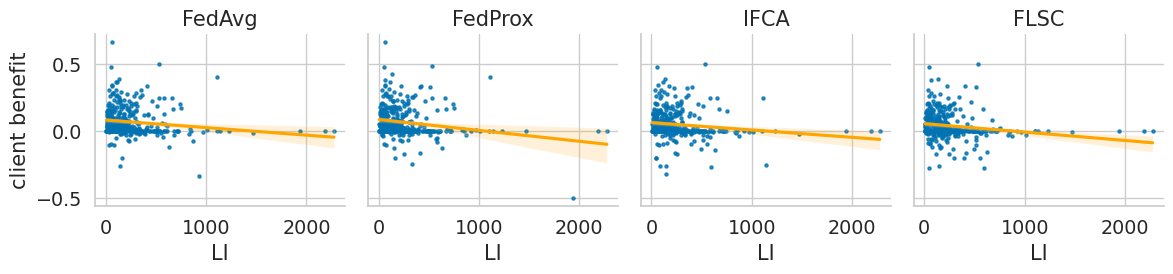

In [261]:
benefit_imbalance_plots(benefits, measure='label_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_label_imbalance_mnist.png"))

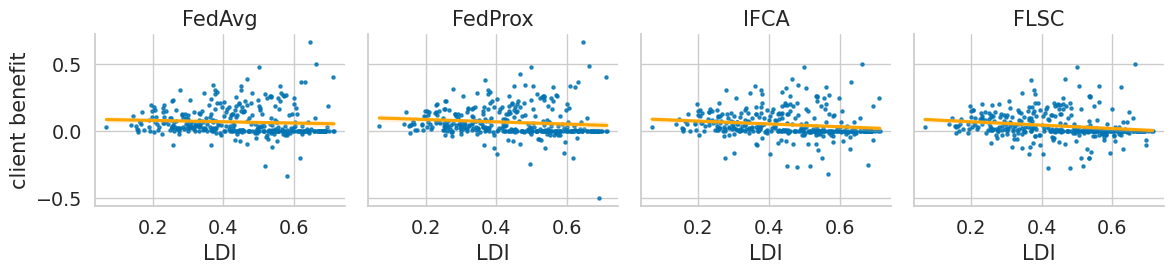

In [262]:
benefit_imbalance_plots(benefits, measure='label_distribution_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_label_distribution_imbalance_mnist.png"))

In [263]:
log_table(benefit_imbalance_reg_quantity(benefits), "Quantity Imbalance on MNIST/label")

algorithm  intercept   p_intercept  beta_log(QI)      p_QI   adj_Rsq
0      FLSC   0.039258  3.458678e-12     -0.010981  0.129245  0.003642
1    FedAvg   0.067030  7.325927e-26     -0.015256  0.051235  0.007811
2   FedProx   0.064498  1.233725e-22     -0.017053  0.037048  0.009330
3      IFCA   0.050147  6.949055e-17     -0.005885  0.437540 -0.001104

In [264]:
log_table(benefit_imbalance_reg_label(benefits), "Label Imbalance on MNIST/label")

algorithm  intercept   beta_LI      p_LI  beta_LDI     p_LDI   adj_Rsq
0      FLSC   0.088610 -0.000037  0.099984 -0.085551  0.048193  0.037124
1    FedAvg   0.076525 -0.000063  0.010424  0.021887  0.643023  0.017136
2   FedProx   0.085611 -0.000084  0.001011  0.008526  0.861498  0.036668
3      IFCA   0.089428 -0.000035  0.138113 -0.066058  0.147205  0.022732

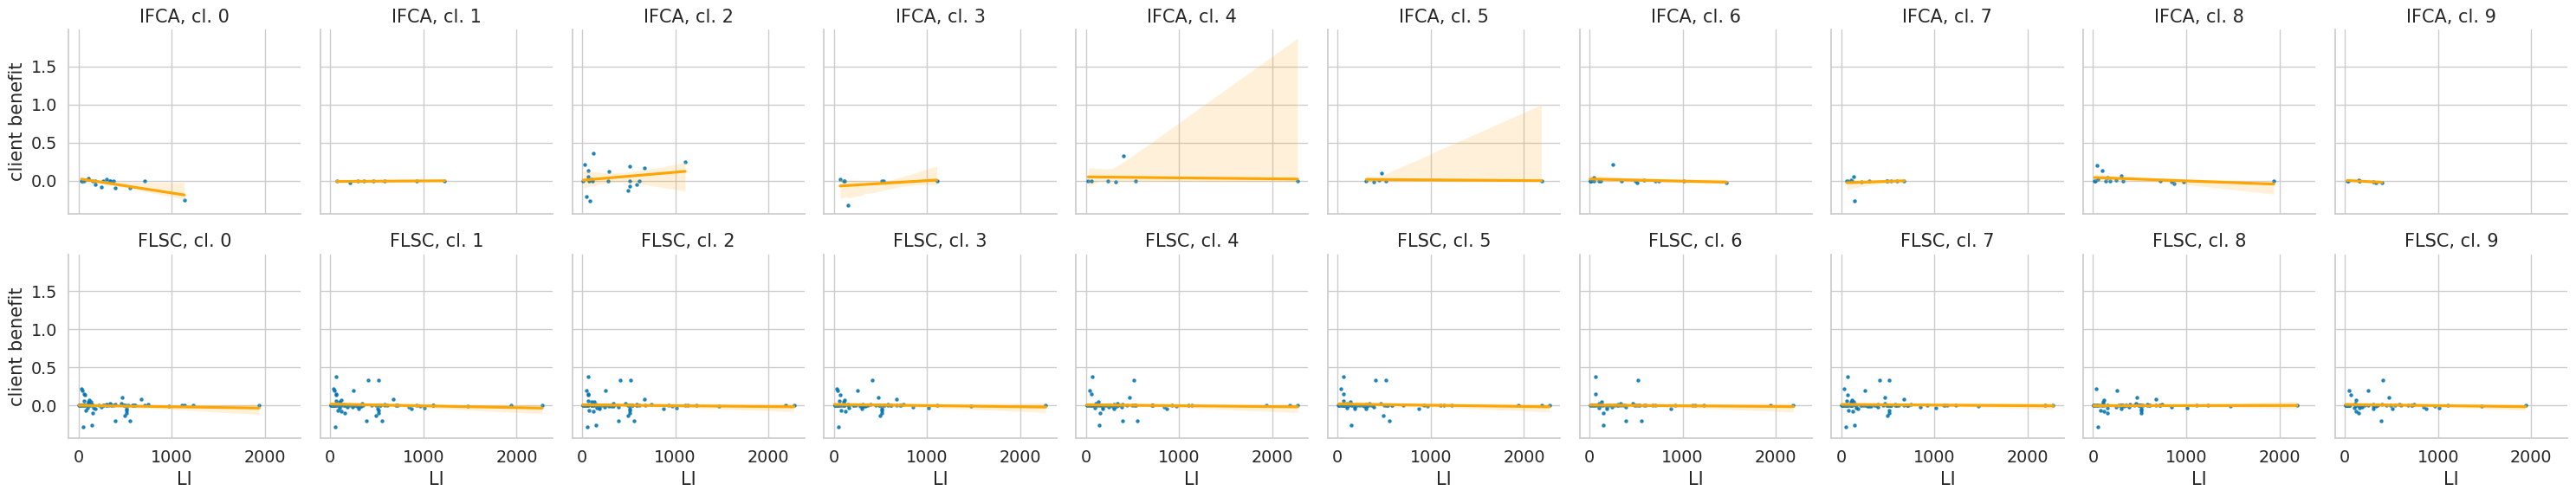

In [265]:
benefit_imbalance_cluster_plots(benefits, measure='label_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_label_imbalance_mnist_clusters.png"))

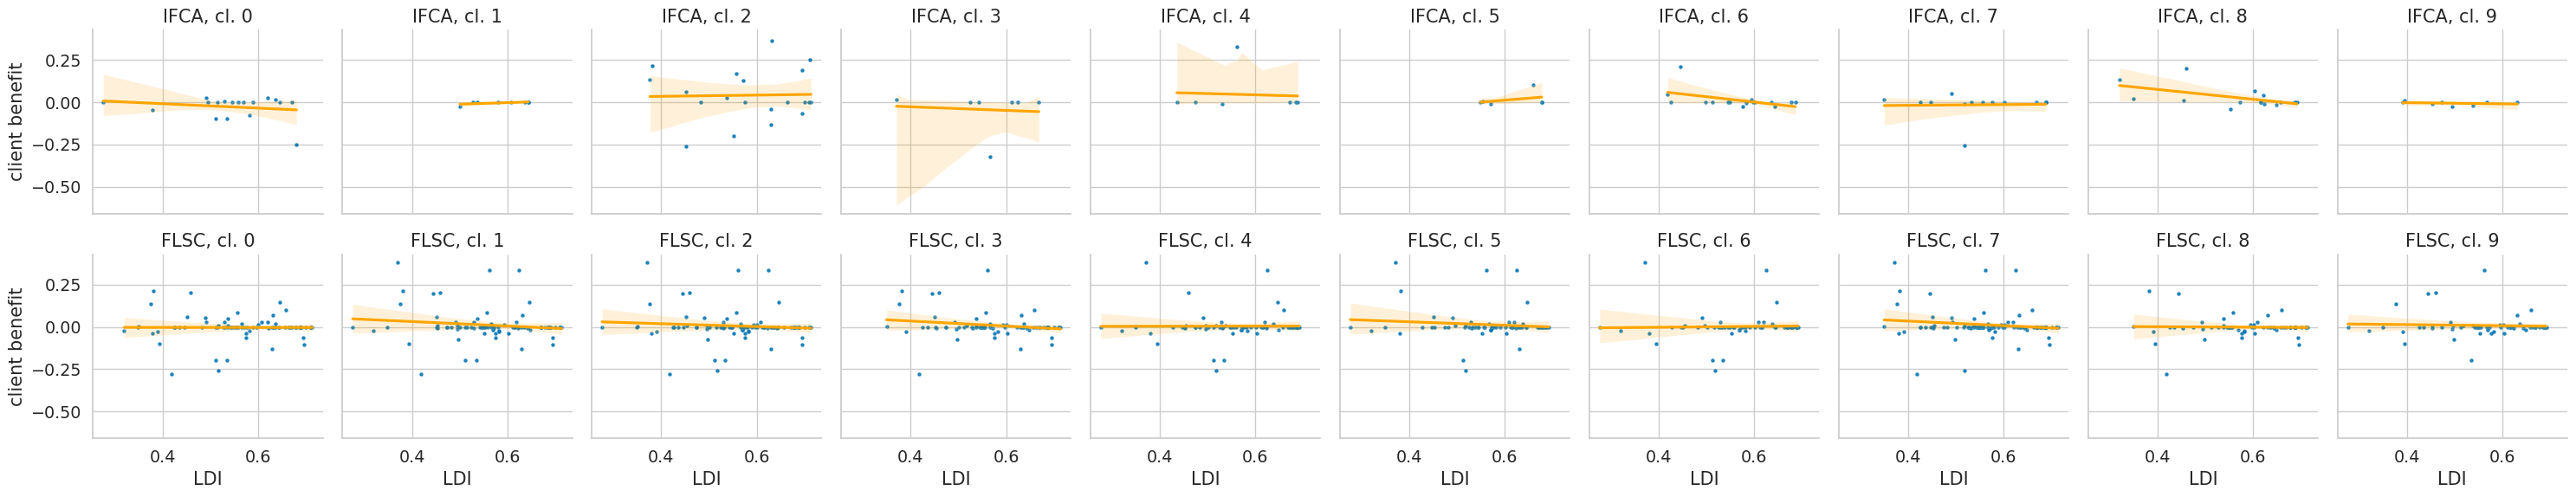

In [266]:
benefit_imbalance_cluster_plots(benefits, measure='label_distribution_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_label_distribution_imbalance_mnist_clusters.png"))

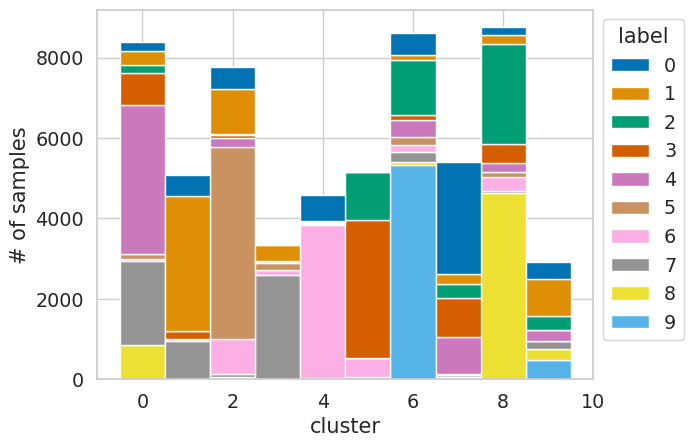

In [267]:
benefit_cluster_histogram(benefits, imbalance_value=0.1, algorithm="IFCA", by="label").savefig(os.path.join(OUTPUT_DIR, "benefits_label_distribution_imbalance_mnist_clusters_histogram.png"))

## Feature (Distribution) Imbalance

### CIFAR-10

In [268]:
conn = connect_to_run(BENEFIT_FEATURE_DISTRIBUTION_CIFAR)
data = get_run_relation(conn)

In [269]:
benefits = compute_client_benefit(conn, data)

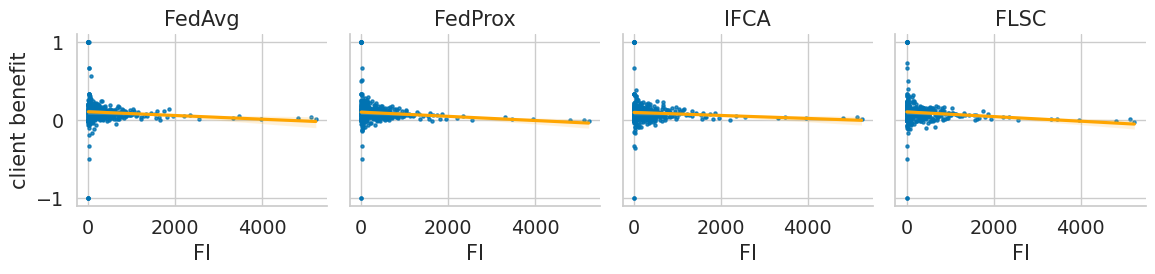

In [270]:
benefit_imbalance_plots(benefits, measure='feature_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_feature_imbalance_cifar10.png"))

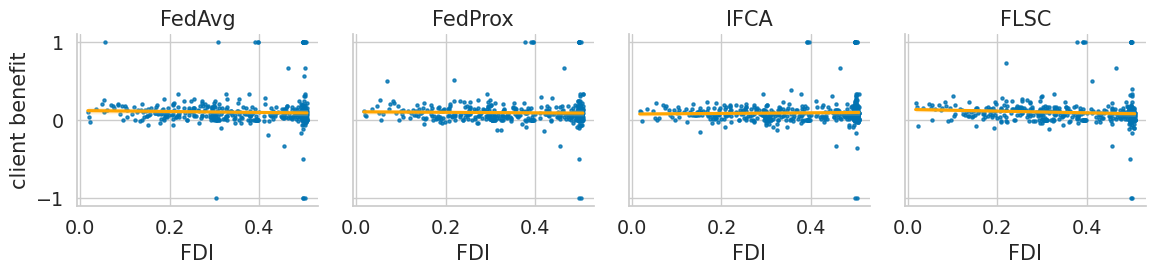

In [271]:
benefit_imbalance_plots(benefits, measure='feature_distribution_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_feature_distribution_imbalance_cifar10.png"))

In [272]:
log_table(benefit_imbalance_reg_quantity(benefits), "Quantity Imbalance on CIFAR-10/feature")

algorithm  intercept   p_intercept  beta_log(QI)      p_QI   adj_Rsq
0   FedProx   0.086420  5.950420e-17     -0.009218  0.043508  0.006425
1      IFCA   0.084436  1.456701e-16     -0.009713  0.031808  0.007534
2      FLSC   0.092802  1.859727e-19     -0.004971  0.270657  0.000451
3    FedAvg   0.091718  3.999069e-15     -0.009562  0.065036  0.005026

In [273]:
log_table(benefit_imbalance_reg_feature(benefits), "Feature Imbalance on CIFAR-10/feature")

algorithm  intercept   beta_LI      p_LI  beta_LDI     p_LDI   adj_Rsq
0   FedProx   0.103400 -0.000027  0.072260  0.003314  0.961077  0.003137
1      IFCA   0.075255 -0.000024  0.107223  0.071847  0.286268  0.002045
2      FLSC   0.134154 -0.000025  0.094989 -0.075613  0.258394  0.007703
3    FedAvg   0.120048 -0.000022  0.201087 -0.030058  0.696828  0.000611

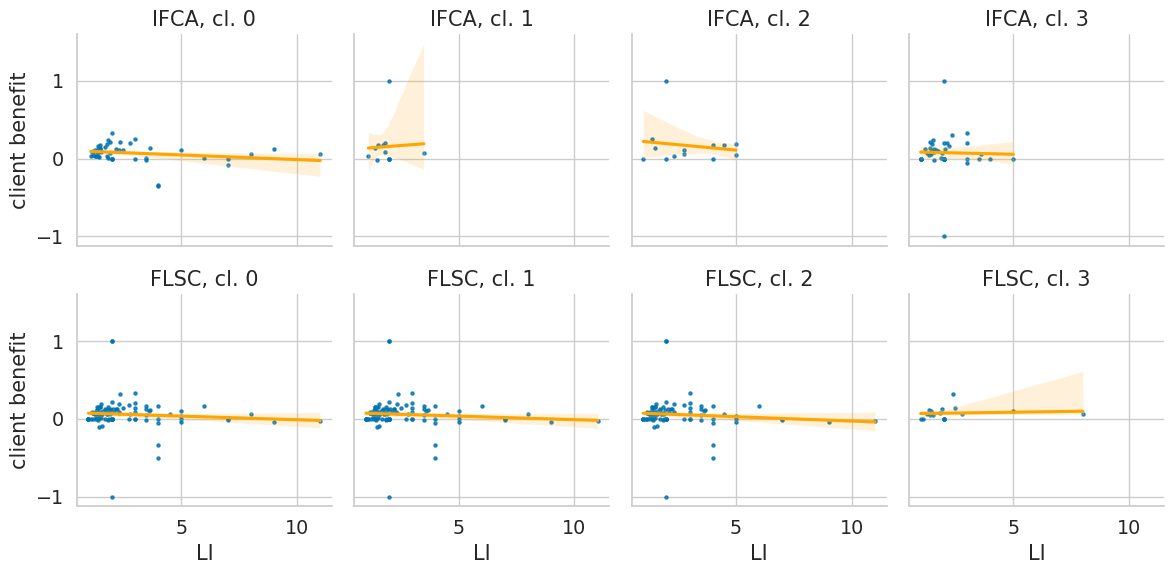

In [274]:
benefit_imbalance_cluster_plots(benefits, measure='label_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_feature_imbalance_cifar10_clusters.png"))

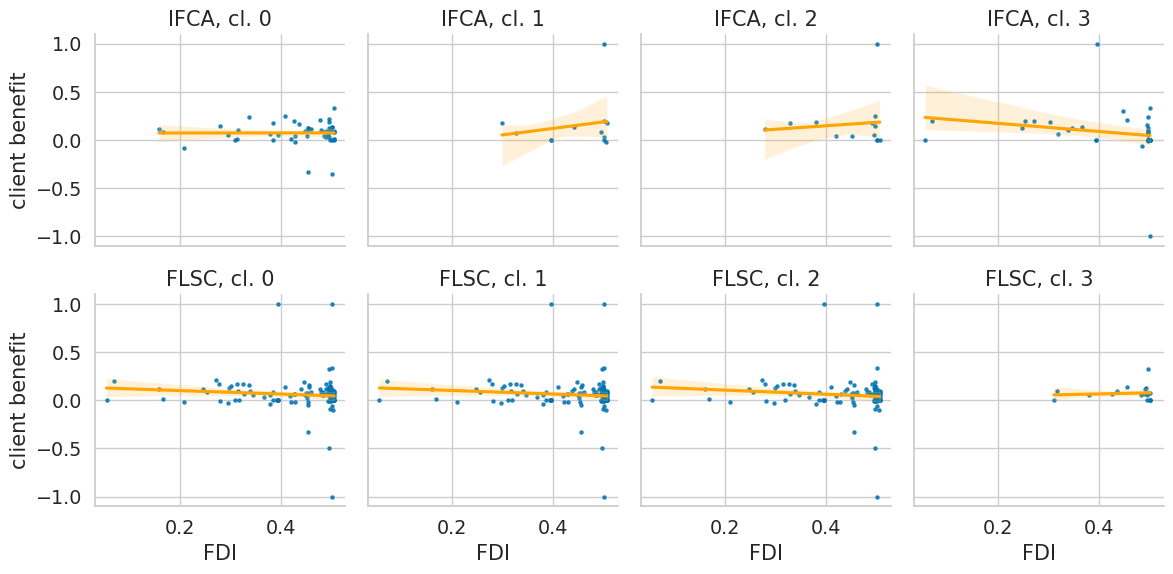

In [275]:
benefit_imbalance_cluster_plots(benefits, measure='feature_distribution_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_feature_distribution_imbalance_cifar10_clusters.png"))

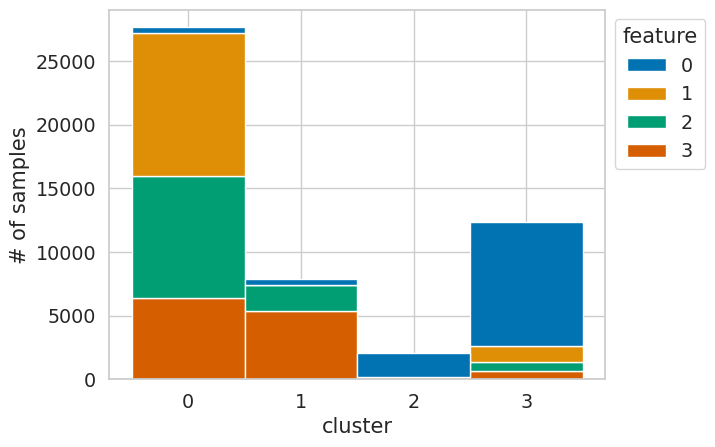

In [276]:
benefit_cluster_histogram(benefits, imbalance_value=0.1, algorithm="IFCA", by="feature").savefig(os.path.join(OUTPUT_DIR, "benefits_feature_distribution_imbalance_cifar10_clusters_histogram_features.png"))

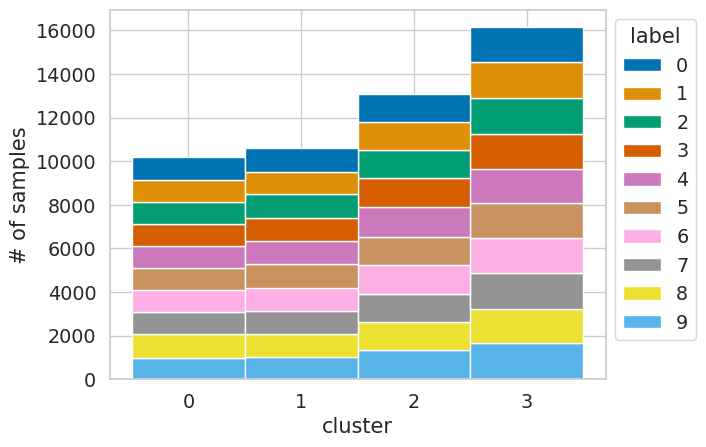

In [277]:
benefit_cluster_histogram(benefits, imbalance_value=1, algorithm="IFCA", by="label").savefig(os.path.join(OUTPUT_DIR, "benefits_feature_distribution_imbalance_cifar10_clusters_histogram_labels.png"))

### MNIST

In [278]:
conn = connect_to_run(BENEFIT_FEATURE_DISTRIBUTION_MNIST)
data = get_run_relation(conn)

In [279]:
benefits = compute_client_benefit(conn, data)

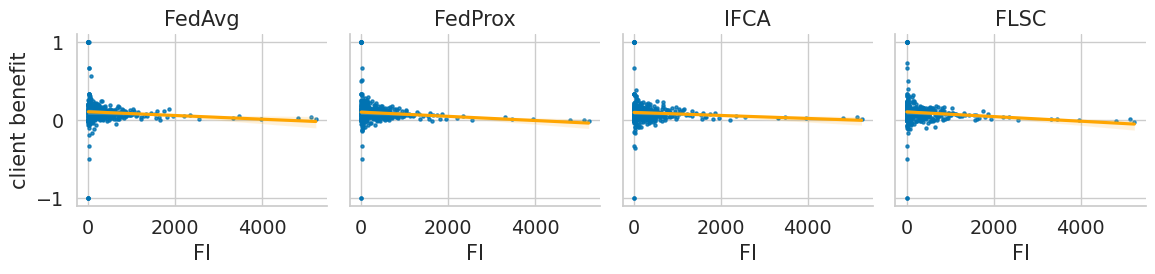

In [280]:
benefit_imbalance_plots(benefits, measure='feature_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_feature_imbalance_mnist.png"))

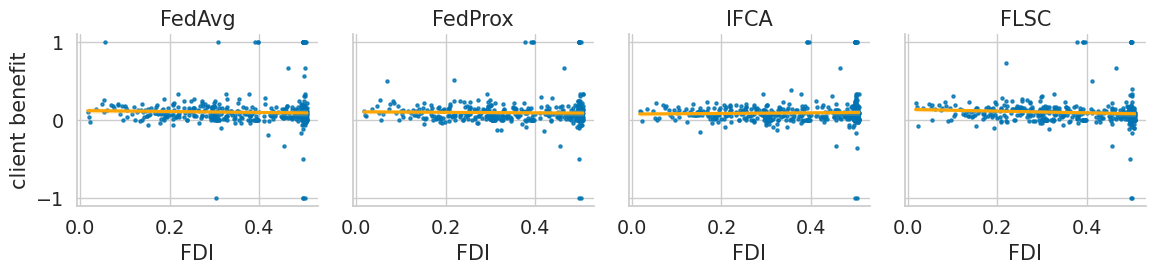

In [281]:
benefit_imbalance_plots(benefits, measure='feature_distribution_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_feature_distribution_imbalance_mnist.png"))

In [282]:
log_table(benefit_imbalance_reg_quantity(benefits), "Quantity Imbalance on MNIST/feature")

algorithm  intercept   p_intercept  beta_log(QI)      p_QI   adj_Rsq
0    FedAvg   0.091718  3.999069e-15     -0.009562  0.065036  0.005026
1      IFCA   0.084436  1.456701e-16     -0.009713  0.031808  0.007534
2      FLSC   0.092802  1.859727e-19     -0.004971  0.270657  0.000451
3   FedProx   0.086420  5.950420e-17     -0.009218  0.043508  0.006425

In [283]:
log_table(benefit_imbalance_reg_feature(benefits), "Feature Imbalance on MNIST/feature")

algorithm  intercept   beta_LI      p_LI  beta_LDI     p_LDI   adj_Rsq
0    FedAvg   0.120048 -0.000022  0.201087 -0.030058  0.696828  0.000611
1      IFCA   0.075255 -0.000024  0.107223  0.071847  0.286268  0.002045
2      FLSC   0.134154 -0.000025  0.094989 -0.075613  0.258394  0.007703
3   FedProx   0.103400 -0.000027  0.072260  0.003314  0.961077  0.003137

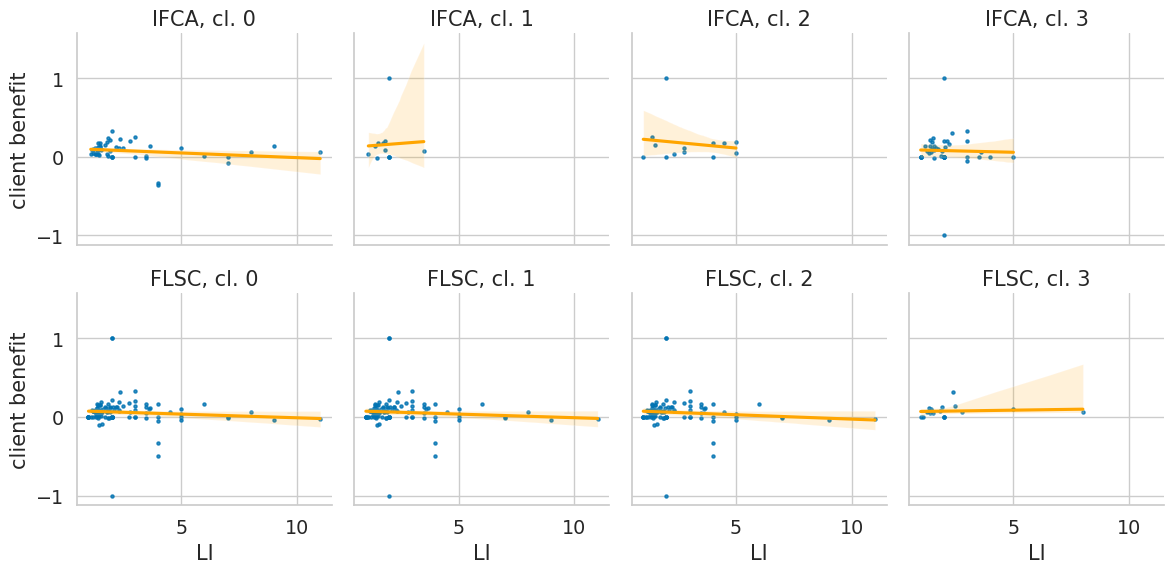

In [284]:
benefit_imbalance_cluster_plots(benefits, measure='label_imbalance', imbalance_value=0.1).savefig(os.path.join(OUTPUT_DIR, "benefits_feature_imbalance_mnist_clusters.png"))

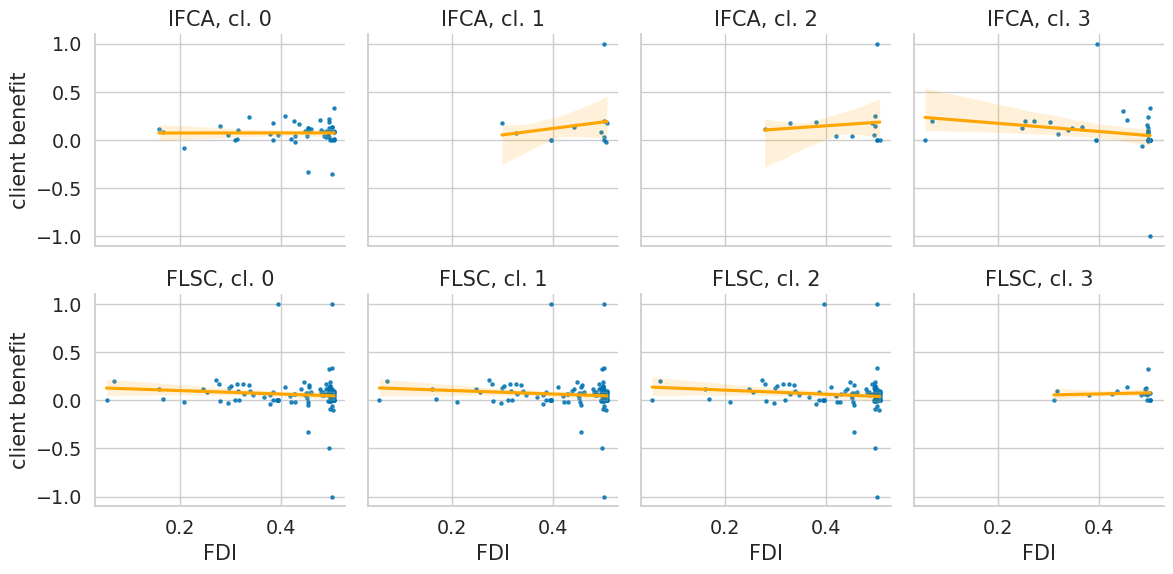

In [285]:
benefit_imbalance_cluster_plots(benefits, measure='feature_distribution_imbalance', imbalance_value=0.1).savefig(os.path.join(OUTPUT_DIR, "benefits_feature_distribution_imbalance_mnist_clusters.png"))

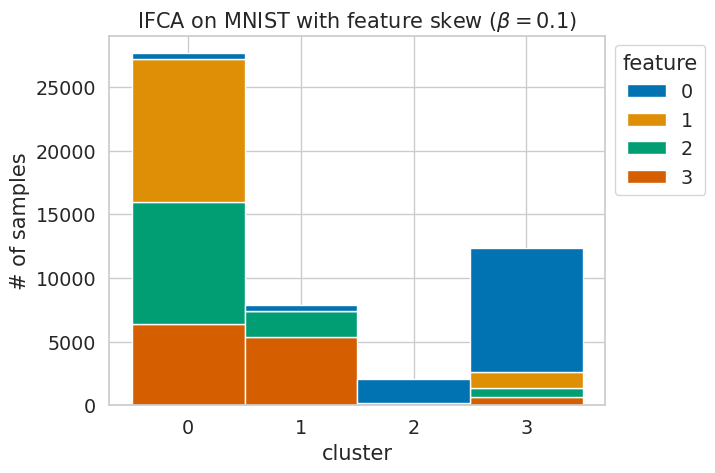

In [286]:
benefit_cluster_histogram(benefits, imbalance_value=0.1, algorithm="IFCA", by="feature", title=r'IFCA on MNIST with feature skew ($\beta=0.1$)')\
    .savefig(os.path.join(OUTPUT_DIR, "benefits_feature_distribution_imbalance_mnist_clusters_histogram_features_ifca_01.png"))

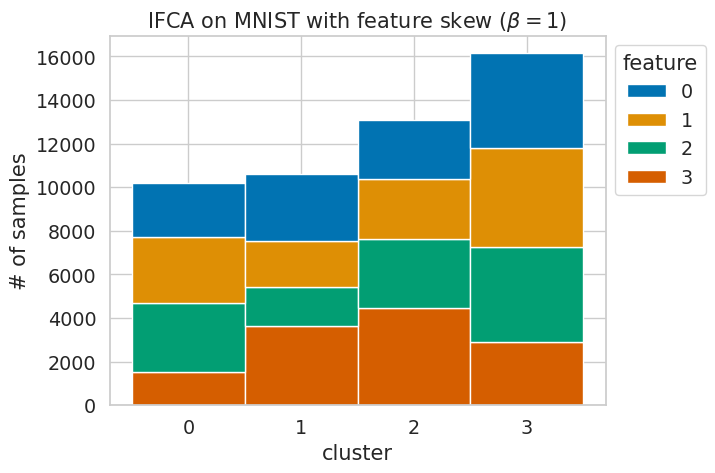

In [287]:
benefit_cluster_histogram(benefits, imbalance_value=1, algorithm="IFCA", by="feature", title=r'IFCA on MNIST with feature skew ($\beta=1$)')\
    .savefig(os.path.join(OUTPUT_DIR, "benefits_feature_distribution_imbalance_mnist_clusters_histogram_features_ifca_1"))

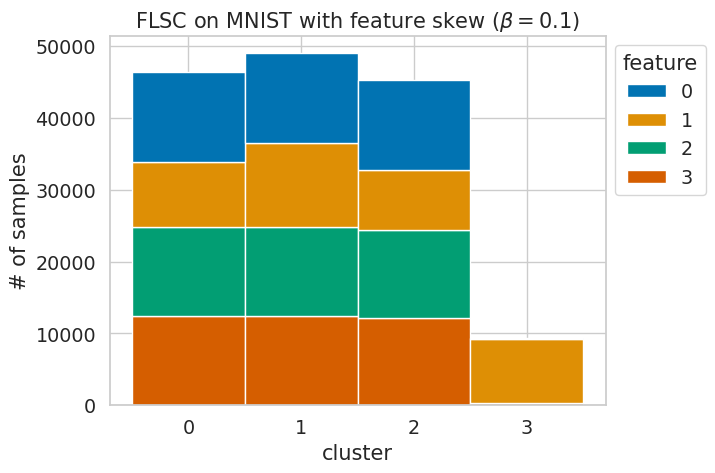

In [288]:
benefit_cluster_histogram(benefits, imbalance_value=0.1, algorithm="FLSC", by="feature", title=r'FLSC on MNIST with feature skew ($\beta=0.1$)')\
    .savefig(os.path.join(OUTPUT_DIR, "benefits_feature_distribution_imbalance_mnist_clusters_histogram_features_flsc_01.png"))

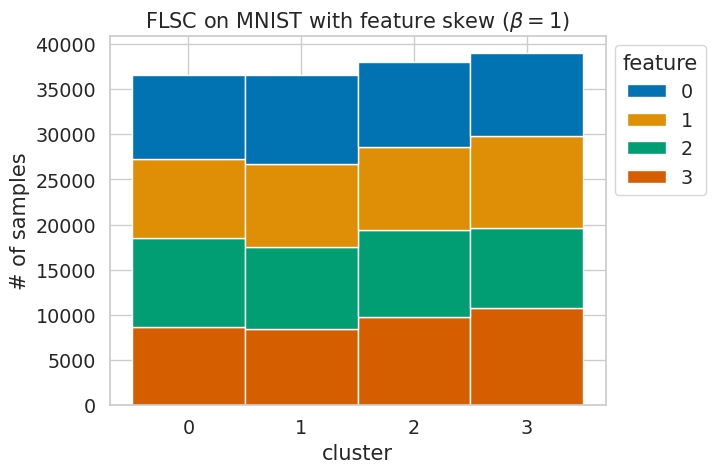

In [289]:
benefit_cluster_histogram(benefits, imbalance_value=1, algorithm="FLSC", by="feature", title=r'FLSC on MNIST with feature skew ($\beta=1$)')\
    .savefig(os.path.join(OUTPUT_DIR, "benefits_feature_distribution_imbalance_mnist_clusters_histogram_features_flsc_1"))

# Client Contribution

## CIFAR-10

In [290]:
conn = connect_to_run(CONTRIBUTION_FEATURE_DISTRIBUTION_CIFAR)
data = get_run_relation(conn)

In [291]:
contribution = compute_client_contribution(conn, data)

### Quantity Imbalance

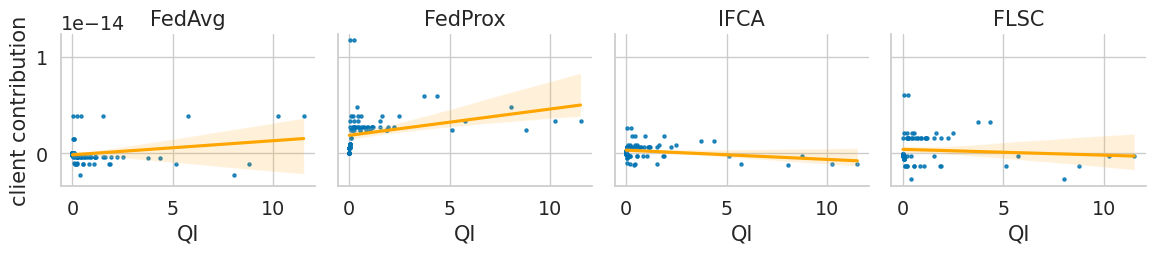

In [292]:
contribution_imbalance_plots(contribution, "quantity_imbalance").savefig(os.path.join(OUTPUT_DIR, "contribution_quantity_imbalance_cifar10.png"))

### Feature Imbalance

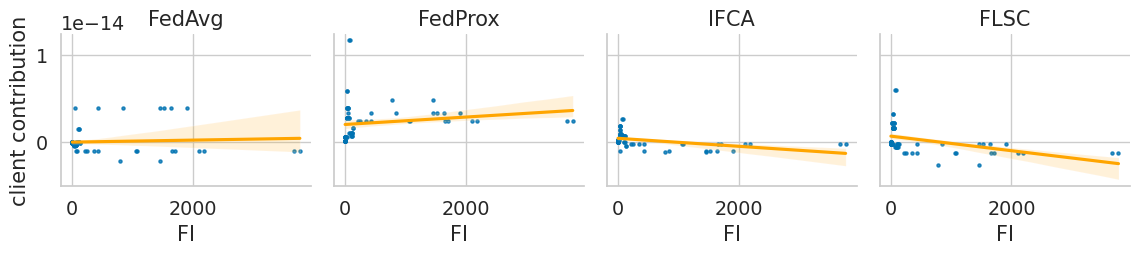

In [296]:
contribution_imbalance_plots(contribution, "feature_imbalance").savefig(os.path.join(OUTPUT_DIR, "contribution_feature_imbalance_cifar10.png"))

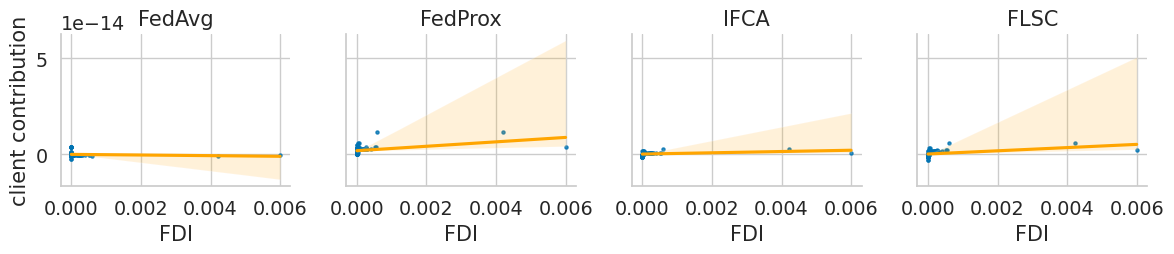

In [297]:
contribution_imbalance_plots(contribution, "feature_distribution_imbalance").savefig(os.path.join(OUTPUT_DIR, "contribution_feature_distribution_imbalance_cifar10.png"))

In [298]:
log_table(contribution_imbalance_reg_quantity(contribution), "CONTRIB: Quantity Imbalance on CIFAR-10/feature")

['imbalance_value', 'algorithm', 'client_contribution', 'left_out_client', 'client_size', 'quantity_imbalance', 'label_imbalance', 'label_distribution_imbalance', 'feature_imbalance', 'feature_distribution_imbalance']
['imbalance_value', 'algorithm', 'client_contribution', 'left_out_client', 'client_size', 'quantity_imbalance', 'label_imbalance', 'label_distribution_imbalance', 'feature_imbalance', 'feature_distribution_imbalance']
['imbalance_value', 'algorithm', 'client_contribution', 'left_out_client', 'client_size', 'quantity_imbalance', 'label_imbalance', 'label_distribution_imbalance', 'feature_imbalance', 'feature_distribution_imbalance']
['imbalance_value', 'algorithm', 'client_contribution', 'left_out_client', 'client_size', 'quantity_imbalance', 'label_imbalance', 'label_distribution_imbalance', 'feature_imbalance', 'feature_distribution_imbalance']


algorithm     intercept   p_intercept       beta_QI      p_QI   adj_Rsq
0    FedAvg -1.383373e-16  3.351234e-01  1.457388e-16  0.016904  0.052485
1   FedProx  1.871174e-15  2.904593e-12  2.715567e-16  0.006220  0.071555
2      IFCA  3.435451e-16  1.425454e-04 -9.559525e-17  0.009813  0.062847
3      FLSC  4.236630e-16  1.631286e-02 -5.975656e-17  0.412275 -0.003624

In [299]:
log_table(contribution_imbalance_reg_feature(contribution), "CONTRIB: Feature Imbalance on CIFAR-10/feature")

algorithm     intercept       beta_LI      p_LI      beta_LDI     p_LDI  \
0      IFCA  3.483069e-16 -4.330017e-19  0.000015  2.946887e-13  0.001683   
1      FLSC  4.993405e-16 -7.669945e-19  0.000037  7.684292e-13  0.000019   
2    FedAvg -5.480689e-19  1.007690e-19  0.581258 -1.582629e-13  0.369240   
3   FedProx  1.749139e-15  5.389642e-19  0.044605  1.197253e-12  0.000010   

    adj_Rsq  
0  0.267713  
1  0.316667  
2 -0.008828  
3  0.203281

## MNIST

In [300]:
conn = connect_to_run(CONTRIBUTION_FEATURE_DISTRIBUTION_MNIST)
data = get_run_relation(conn)

In [301]:
contribution = compute_client_contribution(conn, data)

### Quantity Imbalance

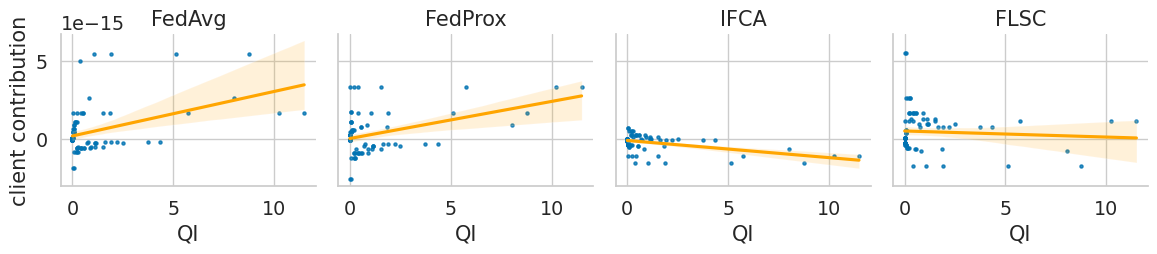

In [302]:
contribution_imbalance_plots(contribution, "quantity_imbalance").savefig(os.path.join(OUTPUT_DIR, "contribution_quantity_imbalance_mnist.png"))

### Feature Imbalance

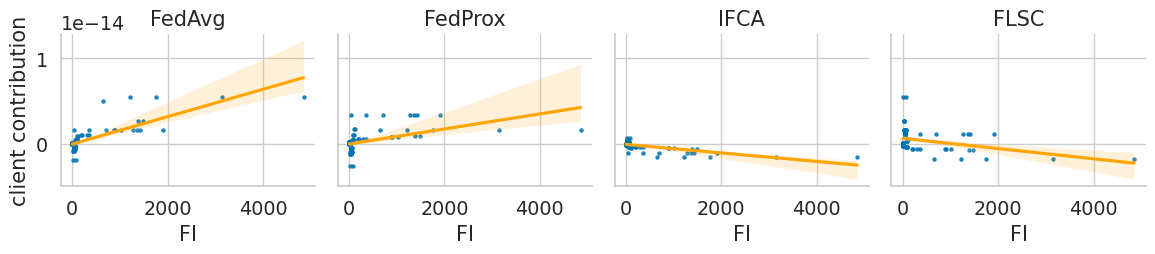

In [303]:
contribution_imbalance_plots(contribution, "feature_imbalance").savefig(os.path.join(OUTPUT_DIR, "contribution_feature_imbalance_mnist.png"))

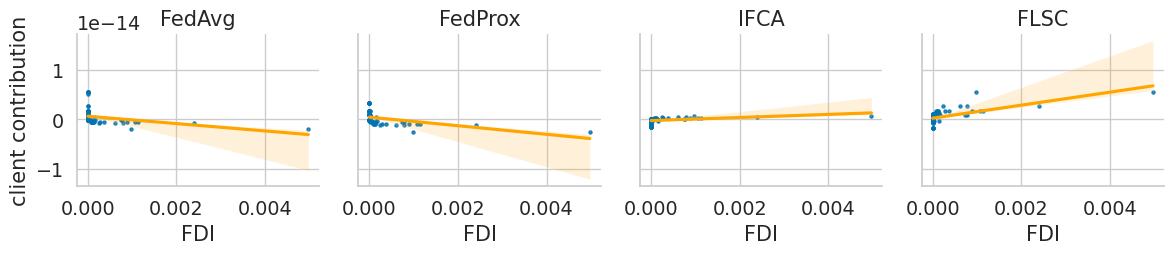

In [304]:
contribution_imbalance_plots(contribution, "feature_distribution_imbalance").savefig(os.path.join(OUTPUT_DIR, "contribution_feature_distribution_imbalance_mnist.png"))

In [305]:
log_table(contribution_imbalance_reg_quantity(contribution), "CONTRIB: Quantity Imbalance on MNIST/feature")

['imbalance_value', 'algorithm', 'client_contribution', 'left_out_client', 'client_size', 'quantity_imbalance', 'label_imbalance', 'label_distribution_imbalance', 'feature_imbalance', 'feature_distribution_imbalance']
['imbalance_value', 'algorithm', 'client_contribution', 'left_out_client', 'client_size', 'quantity_imbalance', 'label_imbalance', 'label_distribution_imbalance', 'feature_imbalance', 'feature_distribution_imbalance']
['imbalance_value', 'algorithm', 'client_contribution', 'left_out_client', 'client_size', 'quantity_imbalance', 'label_imbalance', 'label_distribution_imbalance', 'feature_imbalance', 'feature_distribution_imbalance']
['imbalance_value', 'algorithm', 'client_contribution', 'left_out_client', 'client_size', 'quantity_imbalance', 'label_imbalance', 'label_distribution_imbalance', 'feature_imbalance', 'feature_distribution_imbalance']


algorithm     intercept  p_intercept       beta_QI      p_QI   adj_Rsq
0      IFCA -1.162181e-16     0.028607 -1.101441e-16  0.000003  0.214415
1      FLSC  4.916689e-16     0.001107 -3.894461e-17  0.525756 -0.006721
2   FedProx  9.496135e-18     0.941619  2.378369e-16  0.000032  0.170063
3    FedAvg  1.727181e-16     0.265442  2.855573e-16  0.000028  0.172251

In [306]:
log_table(contribution_imbalance_reg_feature(contribution), "CONTRIB: Feature Imbalance on MNIST/feature")

algorithm     intercept       beta_LI          p_LI      beta_LDI  \
0    FedAvg  7.836490e-17  1.555122e-18  7.923778e-22 -5.473207e-13   
1      IFCA -1.254555e-16 -4.771768e-19  3.244130e-16  2.519499e-13   
2   FedProx  1.391651e-16  8.094857e-19  8.505097e-08 -7.653056e-13   
3      FLSC  3.697899e-16 -4.841624e-19  4.140720e-04  1.249412e-12   

          p_LDI   adj_Rsq  
0  2.114256e-04  0.682550  
1  1.844107e-05  0.595238  
2  8.769959e-06  0.407630  
3  3.119513e-12  0.487065